In [1]:
import os
import glob
import time

import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Bucket 확인

In [2]:
# 내 프로젝트명 확인
!gcloud config list --format 'value(core.project)'

sessac-project-16


In [3]:
# 내 버킷 리스트 확인
!gsutil list

gs://cloud-ai-platform-6f37cb3a-ec61-409a-a082-f8a310d787b0/
gs://sessac-project-16-bucket/


In [4]:
# highway 폴더 생성
# !mkdir highway

## 다른 사람 Bucket에서 데이터 가져오기

In [5]:
# !gsutil ls -r gs://highway-data-bucket/

In [6]:
# !gsutil -m cp gs://highway-data-bucket/highway_yolo.zip highway/highway_yolo.zip

In [7]:
# 용량을 위해 bucket에서 받아온 zip 지우기
# !rm -rf dataset

In [8]:
!pwd

/home/jupyter


## 압축풀기
- 1번은 압축해제 속도가 빠르지만 파일 손실이 많아서 사용 X
- 2번또한 압축해제 속도가 빨라서 주피터 셋팅에서 권한을 일부 수정 필요
- 3번 사용

In [9]:
# 1
# %%time
# import zipfile
# import concurrent.futures
# zf = zipfile.ZipFile('/home/jupyter/highway/highway_yolo.zip')
# def unzip(file):
#     zf.extract(file)
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     executor.map(unzip, zf.infolist())

In [10]:
# 2
# %%time
# import zipfile
# import multiprocessing
# import concurrent.futures

# def unzip(files):
#     with lock:
#         zf.extract(files, path=destPath)

# zipfilePath = '/home/jupyter/highway/highway_yolo.zip'
# destPath = '/home/jupyter/train_test'

# zf = zipfile.ZipFile(zipfilePath)    
# m = multiprocessing.Manager()
# lock = m.Lock()
# ZipInfo=[]
# with concurrent.futures.ProcessPoolExecutor(max_workers=2) as executor:
#     for member in zf.infolist():
#         member.filename = member.filename.encode("utf-8")
#         #member.filename = member.filename.decode("euc-kr").encode("utf-8")
#         print(member.filename)
#     #executor.map(unzip, member)

In [11]:
# %%time
# import zipfile
# import multiprocessing
# import concurrent.futures

# def unzip(file):
#     with lock:
#         zf.extract(file, path='./train_test')

# zipfilePath = '/home/jupyter/highway/highway_yolo.zip'  
# zf = zipfile.ZipFile(zipfilePath)    

# m = multiprocessing.Manager()
# lock = m.Lock()

# with concurrent.futures.ProcessPoolExecutor(max_workers=16) as executor:
#     executor.map(unzip, zf.infolist())

## 데이터 확인

![image](https://github.com/timmyeos/SeSAC/assets/97524127/d63cbad2-c2ce-4027-bcf3-96ba745ce884)

In [12]:
dataPath = '/home/jupyter/train_test/dataset'

In [13]:
# train 개수 확인
a = glob.glob(dataPath+"/train/images/*")
b = glob.glob(dataPath+"/train/labels/*")
len(a), len(b)

(22896, 22896)

In [14]:
# valid 개수 확인
a = glob.glob(dataPath+"/valid/images/*")
b = glob.glob(dataPath+"/valid/labels/*")
len(a), len(b)

(3053, 3053)

## 폴더를 비교해서 파일명이 일치하지 않으면 삭제
- train 파일과 valid 파일을 각각 처리할 필요가 있음

In [15]:
# # image 폴더와 labels 폴더의 경로를 지정합니다.
# image_path = "/home/jupyter/train_test/dataset/train/images"
# labels_path = "/home/jupyter/train_test/dataset/train/labels"

# # image 폴더와 labels 폴더에 있는 모든 파일의 이름을 리스트로 저장합니다.
# image_files = glob.glob(image_path + "/*")
# labels_files = glob.glob(labels_path + "/*")

# # image 폴더와 labels 폴더의 파일 개수를 비교합니다.
# if len(image_files) == len(labels_files):
#     print("파일 개수가 일치합니다.")
# else:
#     print("파일 개수가 일치하지 않습니다.")
    
#     # image 폴더의 파일을 반복
#     for image_file in image_files:
#         label_file = image_file.replace(image_path, labels_path).replace('.png', '.txt')
        
#         # label 파일 확인
#         if os.path.exists(label_file):
#             pass
#         else:
#             # label 파일 누락이라면 image 삭제
#             print(f"{image_file} 파일을 삭제합니다.")
#             os.remove(image_file)

#     # labels 폴더의 파일을 반복
#     for label_file in labels_files:
#         image_file = label_file.replace(labels_path, image_path).replace('.txt', '.png')

#         # image 파일 확인
#         if os.path.exists(image_file):
#             pass
#         else:
#             # image 파일 누락이라면 label 파일 삭제
#             print(f"{label_file} 파일을 삭제합니다.")
#             os.remove(label_file)

In [16]:
# # image 폴더와 labels 폴더의 경로를 지정합니다.
# image_path = "/home/jupyter/train_test/dataset/valid/images"
# labels_path = "/home/jupyter/train_test/dataset/valid/labels"

# # image 폴더와 labels 폴더에 있는 모든 파일의 이름을 리스트로 저장합니다.
# image_files = glob.glob(image_path + "/*")
# labels_files = glob.glob(labels_path + "/*")

# # image 폴더와 labels 폴더의 파일 개수를 비교합니다.
# if len(image_files) == len(labels_files):
#     print("파일 개수가 일치합니다.")
# else:
#     print("파일 개수가 일치하지 않습니다.")
    
#     # image 폴더의 파일을 반복
#     for image_file in image_files:
#         label_file = image_file.replace(image_path, labels_path).replace('.png', '.txt')
        
#         # label 파일 확인
#         if os.path.exists(label_file):
#             pass
#         else:
#             # label 파일 누락이라면 image 삭제
#             print(f"{image_file} 파일을 삭제합니다.")
#             os.remove(image_file)

#     # labels 폴더의 파일을 반복
#     for label_file in labels_files:
#         image_file = label_file.replace(labels_path, image_path).replace('.txt', '.png')

#         # image 파일 확인
#         if os.path.exists(image_file):
#             pass
#         else:
#             # image 파일 누락이라면 label 파일 삭제
#             print(f"{label_file} 파일을 삭제합니다.")
#             os.remove(label_file)

## 시각화
- box가 제대로 그려졌는지 확인

In [17]:
# !pip install opencv-python

In [18]:
def glob_files(path, file_type="*"):
    search_string = os.path.join(path, file_type)
    files = glob.glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
        if os.path.isdir(f):
            sub_paths = glob_files(f + '/')
            paths += sub_paths
        else:
            paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

In [19]:
import cv2
import numpy as np

IMAGE_SIZE = 600

def load_images(path):
    files = glob_files(path, "*.png")
    
    files.sort() #####
    
    # print(files)
    X_data = []
    for file in files[:10]: ##### 10개만
        image = cv2.imread(file)
        # print(image.shape)
        # x = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

        X_data.append(image)
    return np.array(X_data)

X_test = load_images(dataPath+"/train/images")

In [20]:
WIDTH = 1080
HEIGHT = 1920

def load_labels(path):
    files = glob_files(path, "*.txt")
    
    files.sort() #####

    Y_data = []
    for file in files[:10]: ##### 10개만
        with open(file) as f:
            lines = f.readlines()

            boxes = []
            for line in lines:
                tokens = line.split()

                class_id = int(tokens[0])
                xc = float(tokens[1]) * WIDTH
                yc = float(tokens[2]) * HEIGHT
                width = float(tokens[3]) * WIDTH
                height = float(tokens[4]) * HEIGHT

                boxes.append(np.array([class_id, xc, yc, width, height]))
                # print(class_id, xc, yc, width, height)

            Y_data.append(np.array(boxes))
        # print(lines)
    return np.array(Y_data, dtype="object")

Y_test = load_labels(dataPath+"/train/labels")

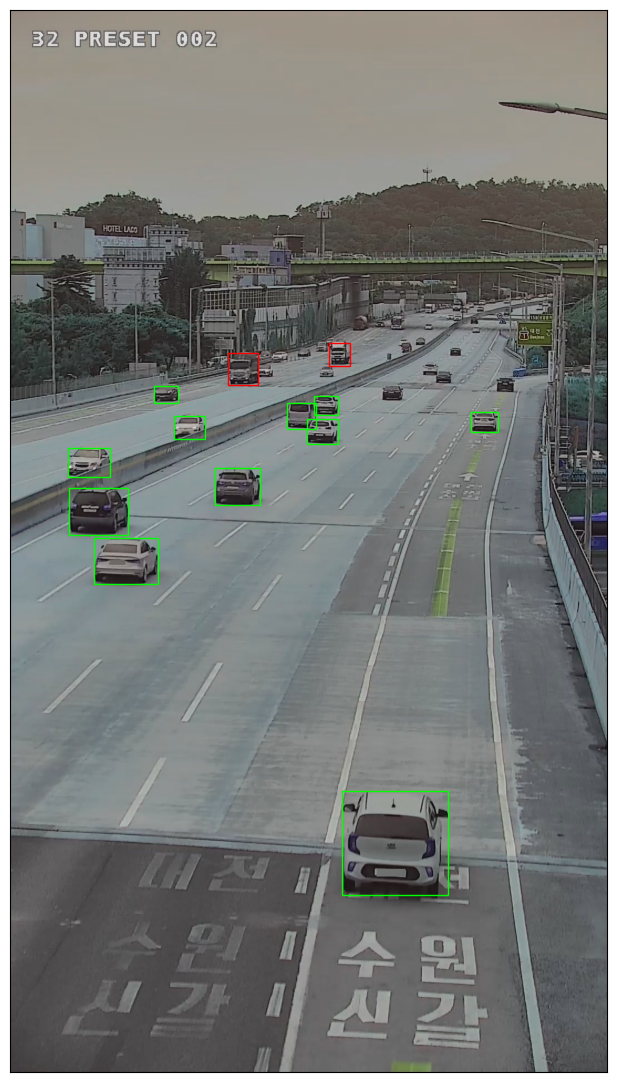

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_patch_rectangle(y, color):
  # # in yolov5
  width = int(y[2])
  height = int(y[3])
  return patches.Rectangle((int(y[0] - width/2), int(y[1] - height/2)),
                           width, height,
                           edgecolor=color, fill=False)

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def plot_image(image, boxes, axis):
  # # print(boxes.shape)
  for box in boxes:
    # print(box)
    class_id = int(box[0])
    # print(type(class_id), class_id)
    rect = create_patch_rectangle(box[1:], COLORS[class_id])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], Y[id], axis)

plot_images(np.array([X_test[-1]]), np.array([Y_test[-1]]))

## 경로 설정

In [22]:
import os
from glob import glob

trainPath = os.path.join(dataPath,'train')
validPath = os.path.join(dataPath,'valid')
testPath  = os.path.join(dataPath,'test')

trainImagesPath = os.path.join(trainPath, 'images')
validImagesPath = os.path.join(validPath, 'images')
testImagesPath  = os.path.join(testPath,  'images')

trainLabelsPath = os.path.join(trainPath, 'labels')
validLabelsPath = os.path.join(validPath, 'labels')
testLabelsPath  = os.path.join(testPath,  'labels')

In [23]:
trainImagesPath, trainLabelsPath

('/home/jupyter/train_test/dataset/train/images',
 '/home/jupyter/train_test/dataset/train/labels')

## 그래픽카드 연결 확인

In [24]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} \
    ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.0+cu118     (NVIDIA A100-SXM4-40GB)


In [25]:
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [26]:
# device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')
# device

In [27]:
!nvidia-smi

Wed Nov 22 12:49:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    54W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:00:05.0 Off |                    0 |
| N/A   

## Yolo v8 패키지 설치
- ultralytics 설치

In [28]:
# !pip install ultralytics==8.0.20

In [29]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
Setup complete ✅ (24 CPUs, 167.1 GB RAM, 35.8/98.2 GB disk)


In [30]:
from ultralytics import YOLO

from IPython.display import display, Image

## data.yaml 파일 작성

In [31]:
!pwd

/home/jupyter


In [32]:
%cd /home/jupyter/train_test/dataset/

/home/jupyter/train_test/dataset


In [33]:
!ls -al

total 50928
drwxr-xr-x 6 jupyter jupyter     4096 Nov 22 12:24 .
drwxr-xr-x 3 jupyter jupyter     4096 Nov 22 12:11 ..
drwxr-xr-x 2 jupyter jupyter     4096 Nov 22 12:20 .ipynb_checkpoints
-rw-r--r-- 1 jupyter jupyter      142 Nov 22 12:39 data.yaml
drwxr-xr-x 3 jupyter jupyter     4096 Nov 22 12:23 runs
drwxr-xr-x 4 jupyter jupyter     4096 Nov 22 12:42 train
drwxr-xr-x 4 jupyter jupyter     4096 Nov 22 12:45 valid
-rw------- 1 jupyter jupyter 52117635 Nov 22 12:24 yolov8m.pt


In [34]:
from IPython.core.magic import register_line_cell_magic

# yaml에 직접 쓰기를 실행하는 함수
@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [35]:
dataYaml = os.path.join(dataPath,'data.yaml')
print(dataPath)
print(dataYaml)

/home/jupyter/train_test/dataset
/home/jupyter/train_test/dataset/data.yaml


In [36]:
print(trainImagesPath)
print(validImagesPath)
print(testImagesPath)

/home/jupyter/train_test/dataset/train/images
/home/jupyter/train_test/dataset/valid/images
/home/jupyter/train_test/dataset/test/images


아래코드를 실행하여 yaml 파일 생성하고 새로 고침 후 확인할 것

In [37]:
%%writetemplate {dataYaml}
train: {trainImagesPath}
val: {validImagesPath}

nc: 3
names: ['car', 'bus', 'truck']

## Yolo v8 model 

In [38]:
# AttributeError: 'FreeTypeFont' object has no attribute 'getsize'
!pip install Pillow==9.5.0

In [39]:
!yolo task=detect mode=train model=yolov8m.pt data={dataYaml} epochs=100 imgsz=640 plots=True device=1 batch=32 cache=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.13 torch-2.0.0+cu118 CUDA:1 (NVIDIA A100-SXM4-40GB, 40338MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/home/jupyter/train_test/dataset/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, cache=True, device=1, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

## Yolo v8 Test

In [ ]:
### 학습된 모델을 테스트 하는 방법
### 1. ultralytics버전을 확인 하세요.
### 새로운 버전이 나왔습니다.ㅜㅜ 

#!pip list | grep ultra
#ultralytics                              8.0.216

### 2. 기존 ultralytics버전을 삭제하고 신규 버전으로 확인 하세요.

# !pip uninstall -y ultralytics
# !pip install ultralytics

### 3. 학습된 모델을 선택하고, 테스트할 부분을 넣으면 됩니다.
### 아래의 내용은 동영상으로 테스트 하였습니다.

# model = '/home/jupyter/runs/detect/train6/weights/best.pt' 
# source = '/home/jupyter/cctv_datasets/cctv_storage_20231120/IMG_0835.MOV'

### 4. CLI로 테스트 하세요. Python 버전은 안됩니다!

# !yolo task=detect mode=predict show=True model={model} source={source} imgsz=640 save=True name='highway_test'

## Yolo v8 Result metrics

In [46]:
!ls ~/train_test/dataset/runs/detect/train6/

F1_curve.png					    train_batch2.jpg
PR_curve.png					    train_batch64440.jpg
P_curve.png					    train_batch64441.jpg
R_curve.png					    train_batch64442.jpg
args.yaml					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1700657367.yolov8-a100.25365.0  val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/home/jupyter


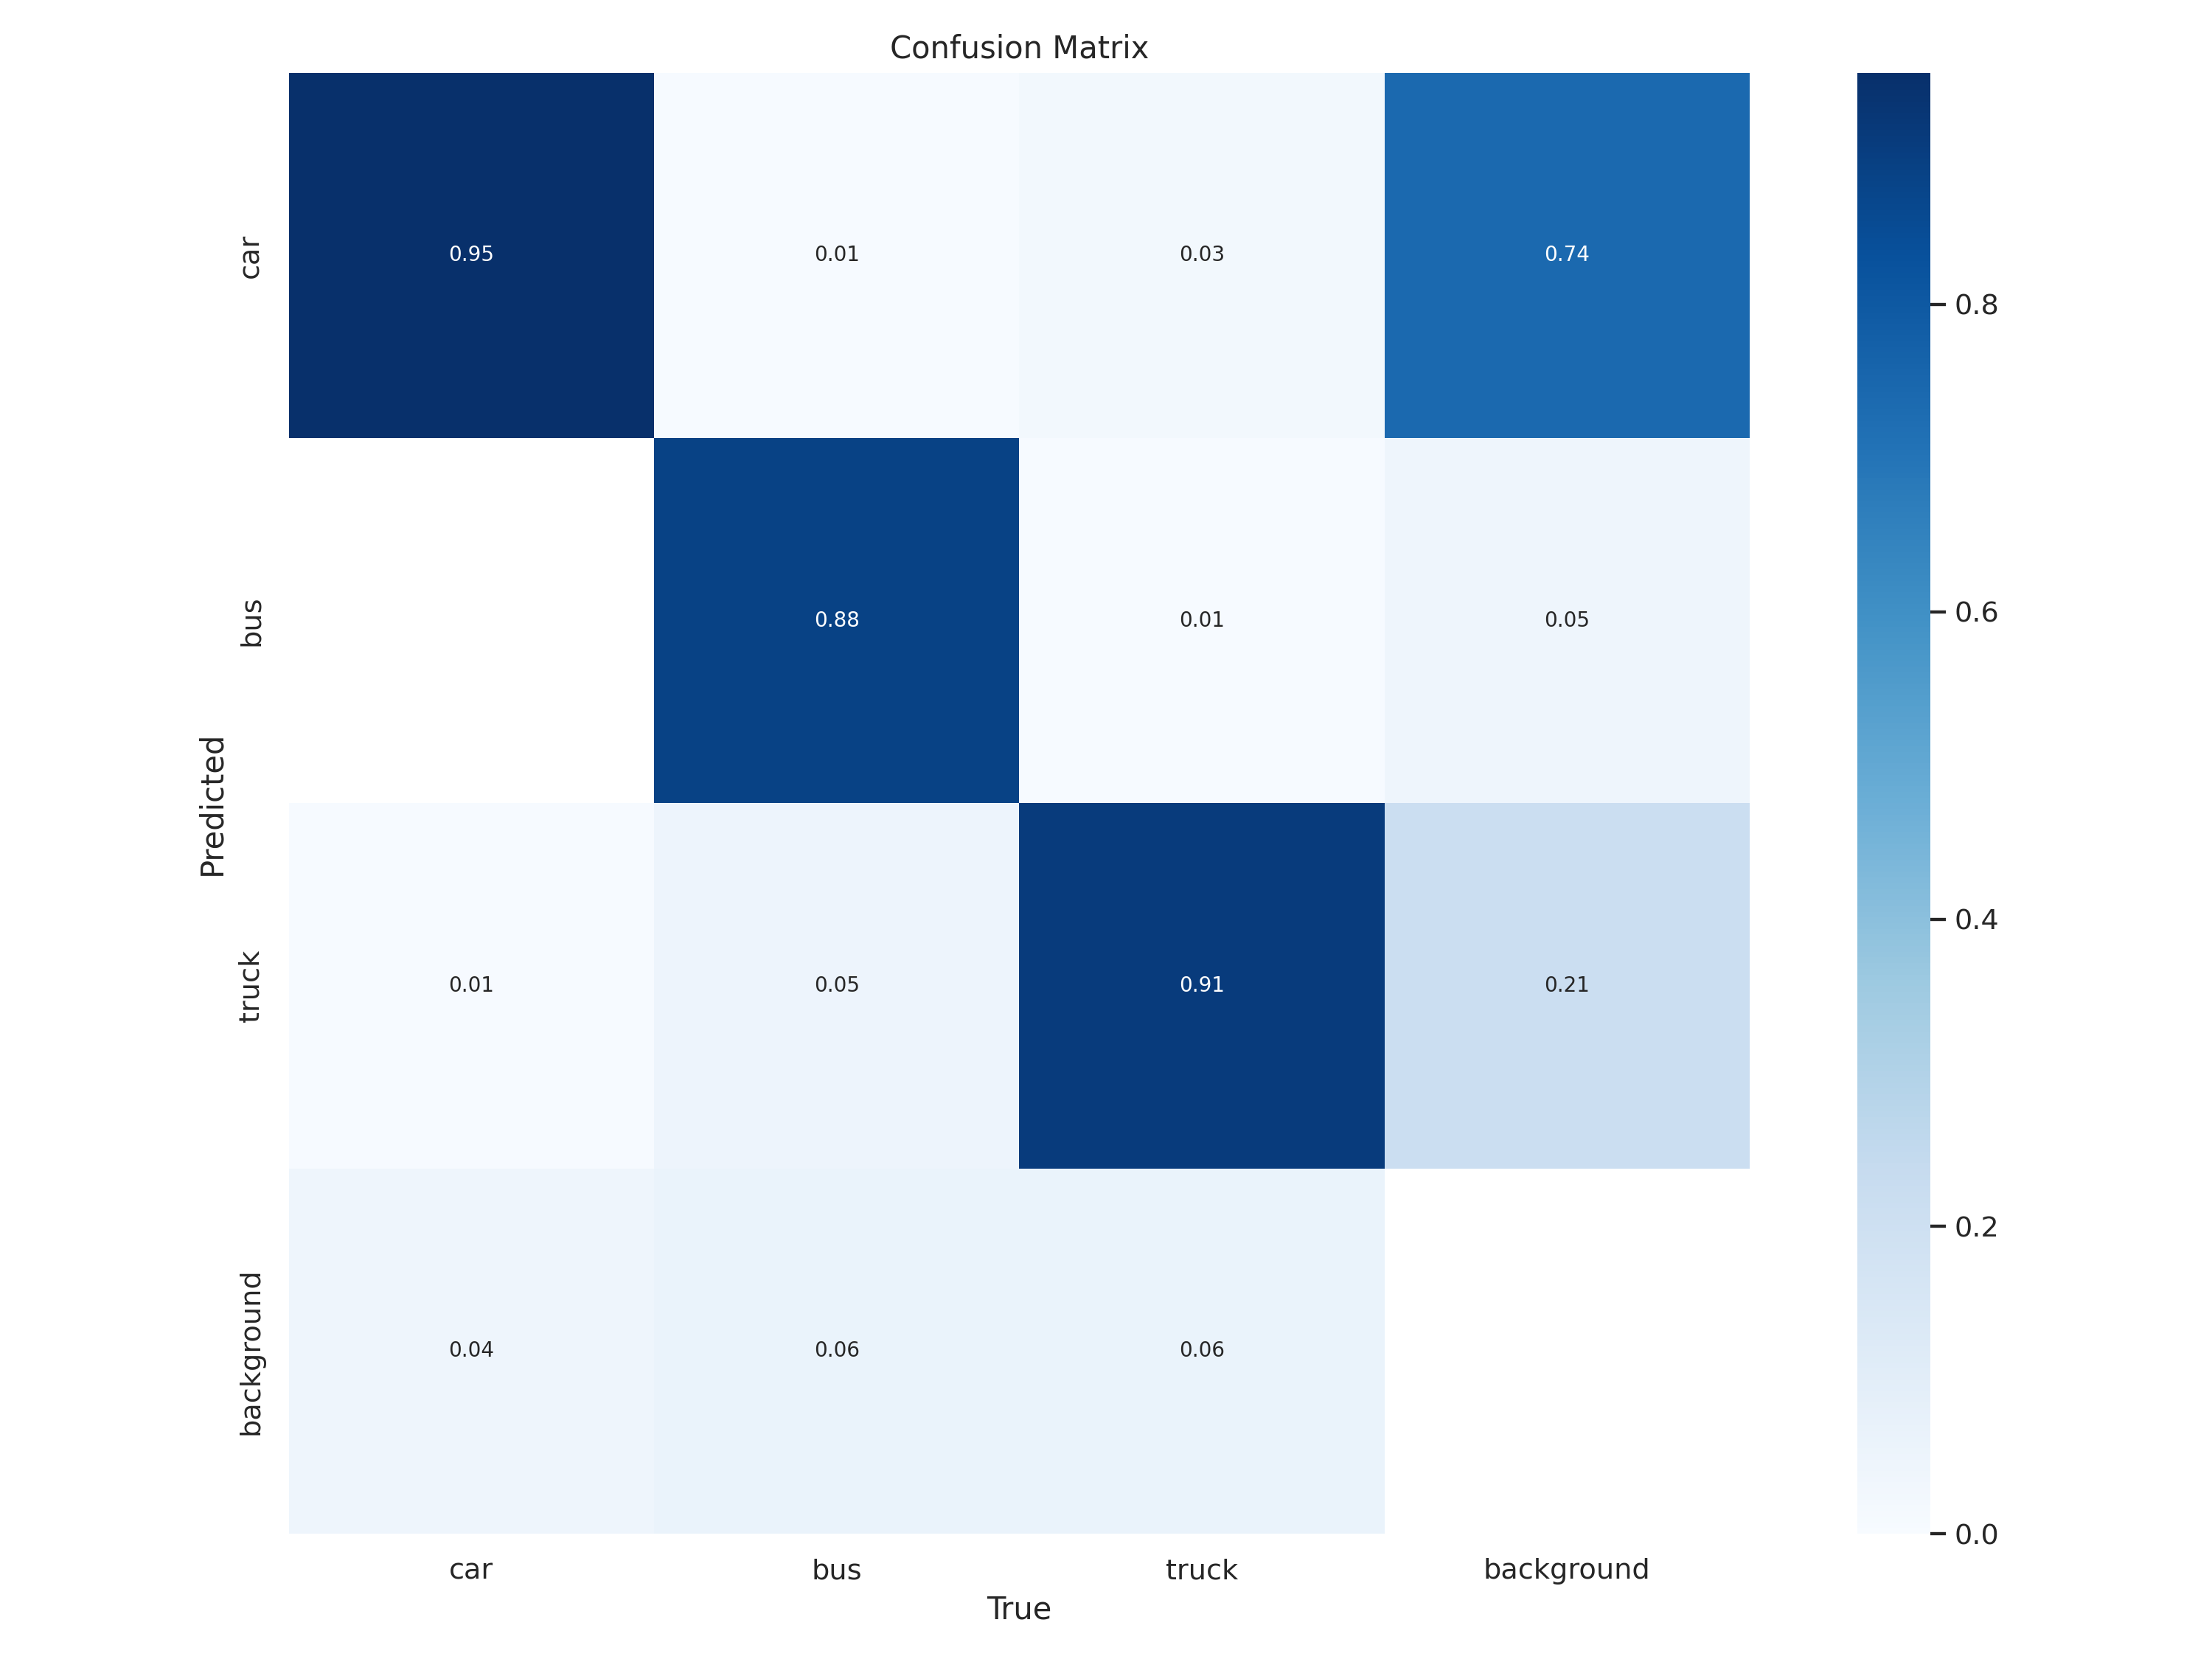

In [54]:
%cd ~/
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/confusion_matrix.png', width=600)

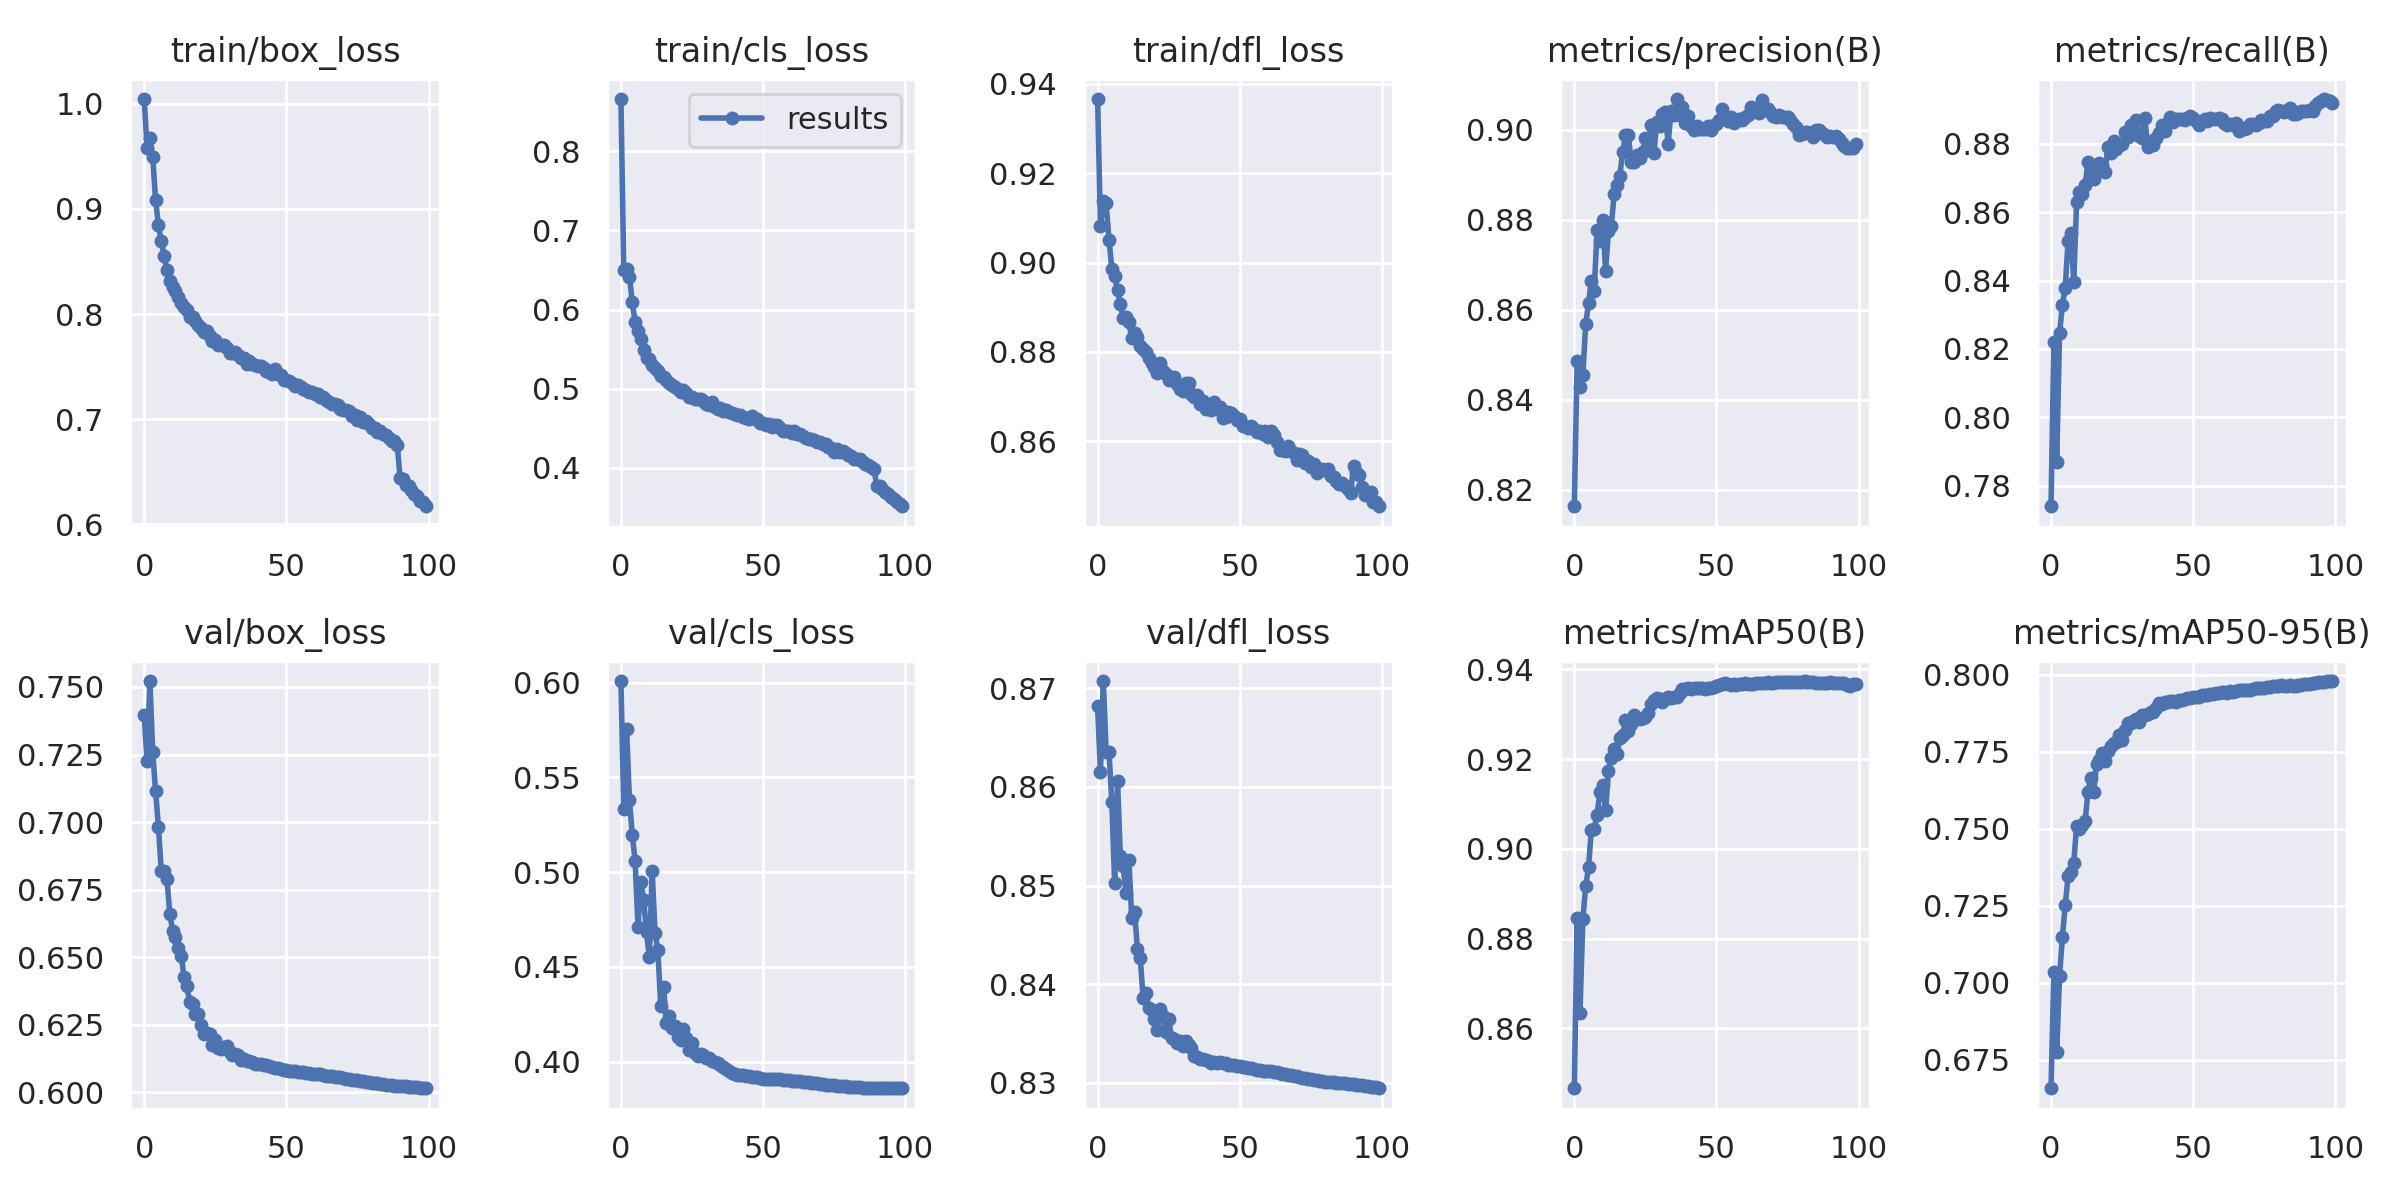

In [55]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/results.png', width=600)

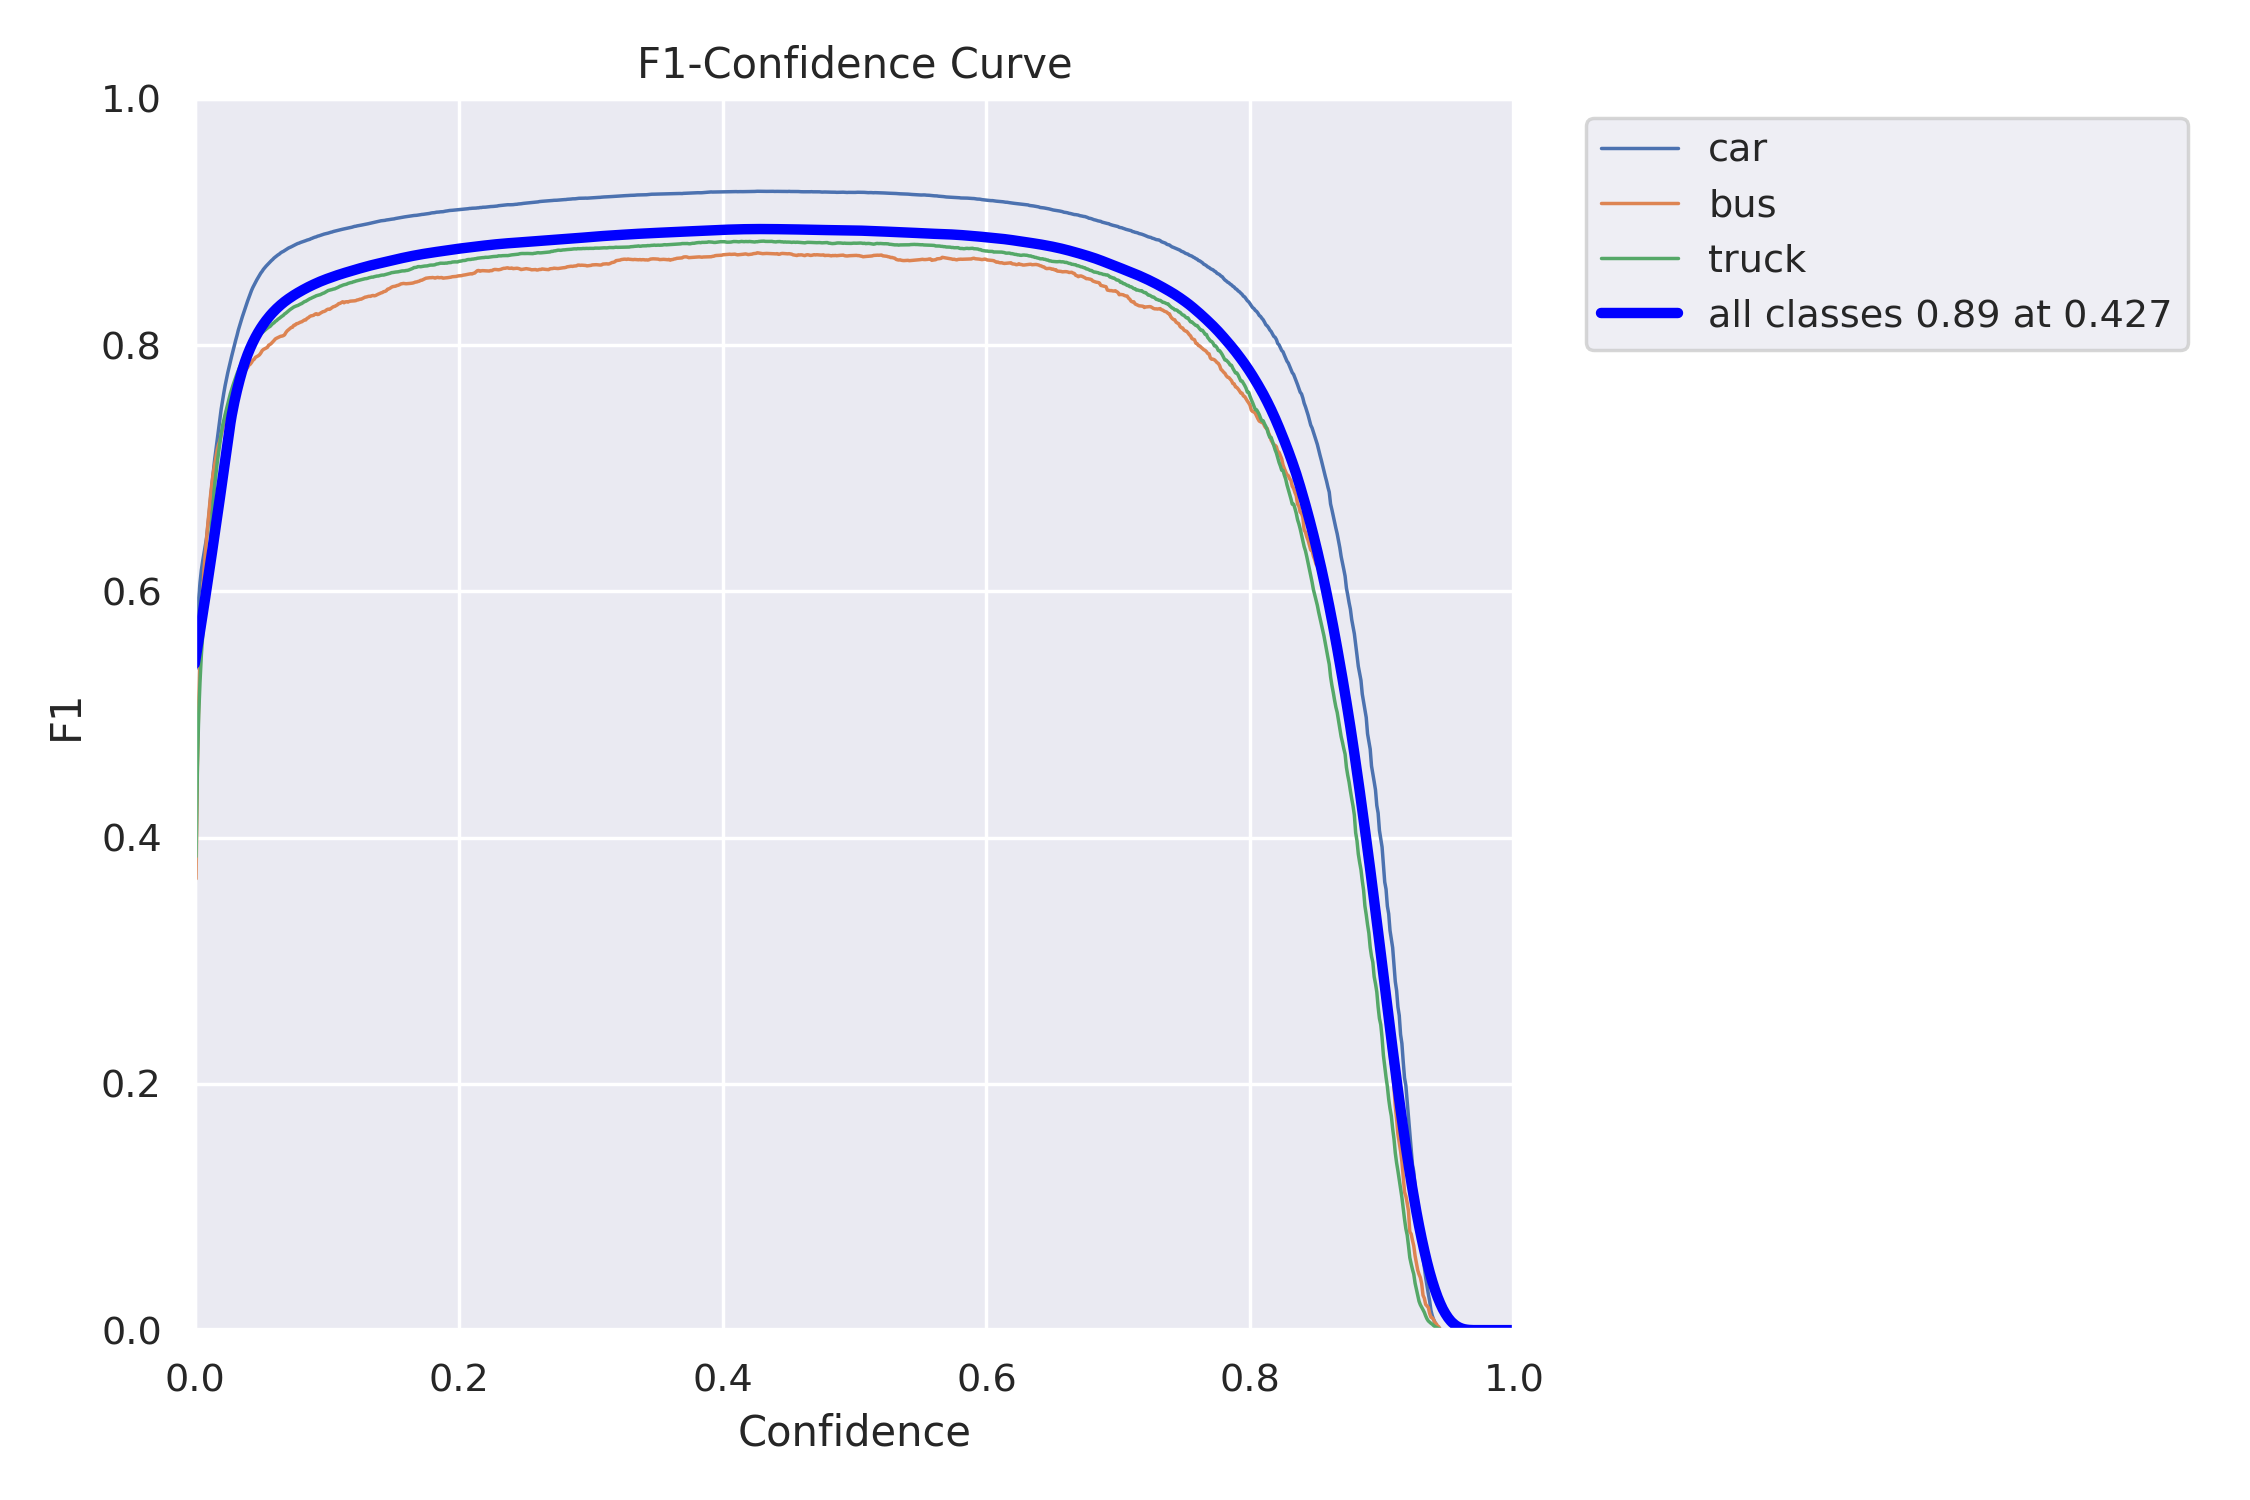

In [57]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/F1_curve.png', width=600)

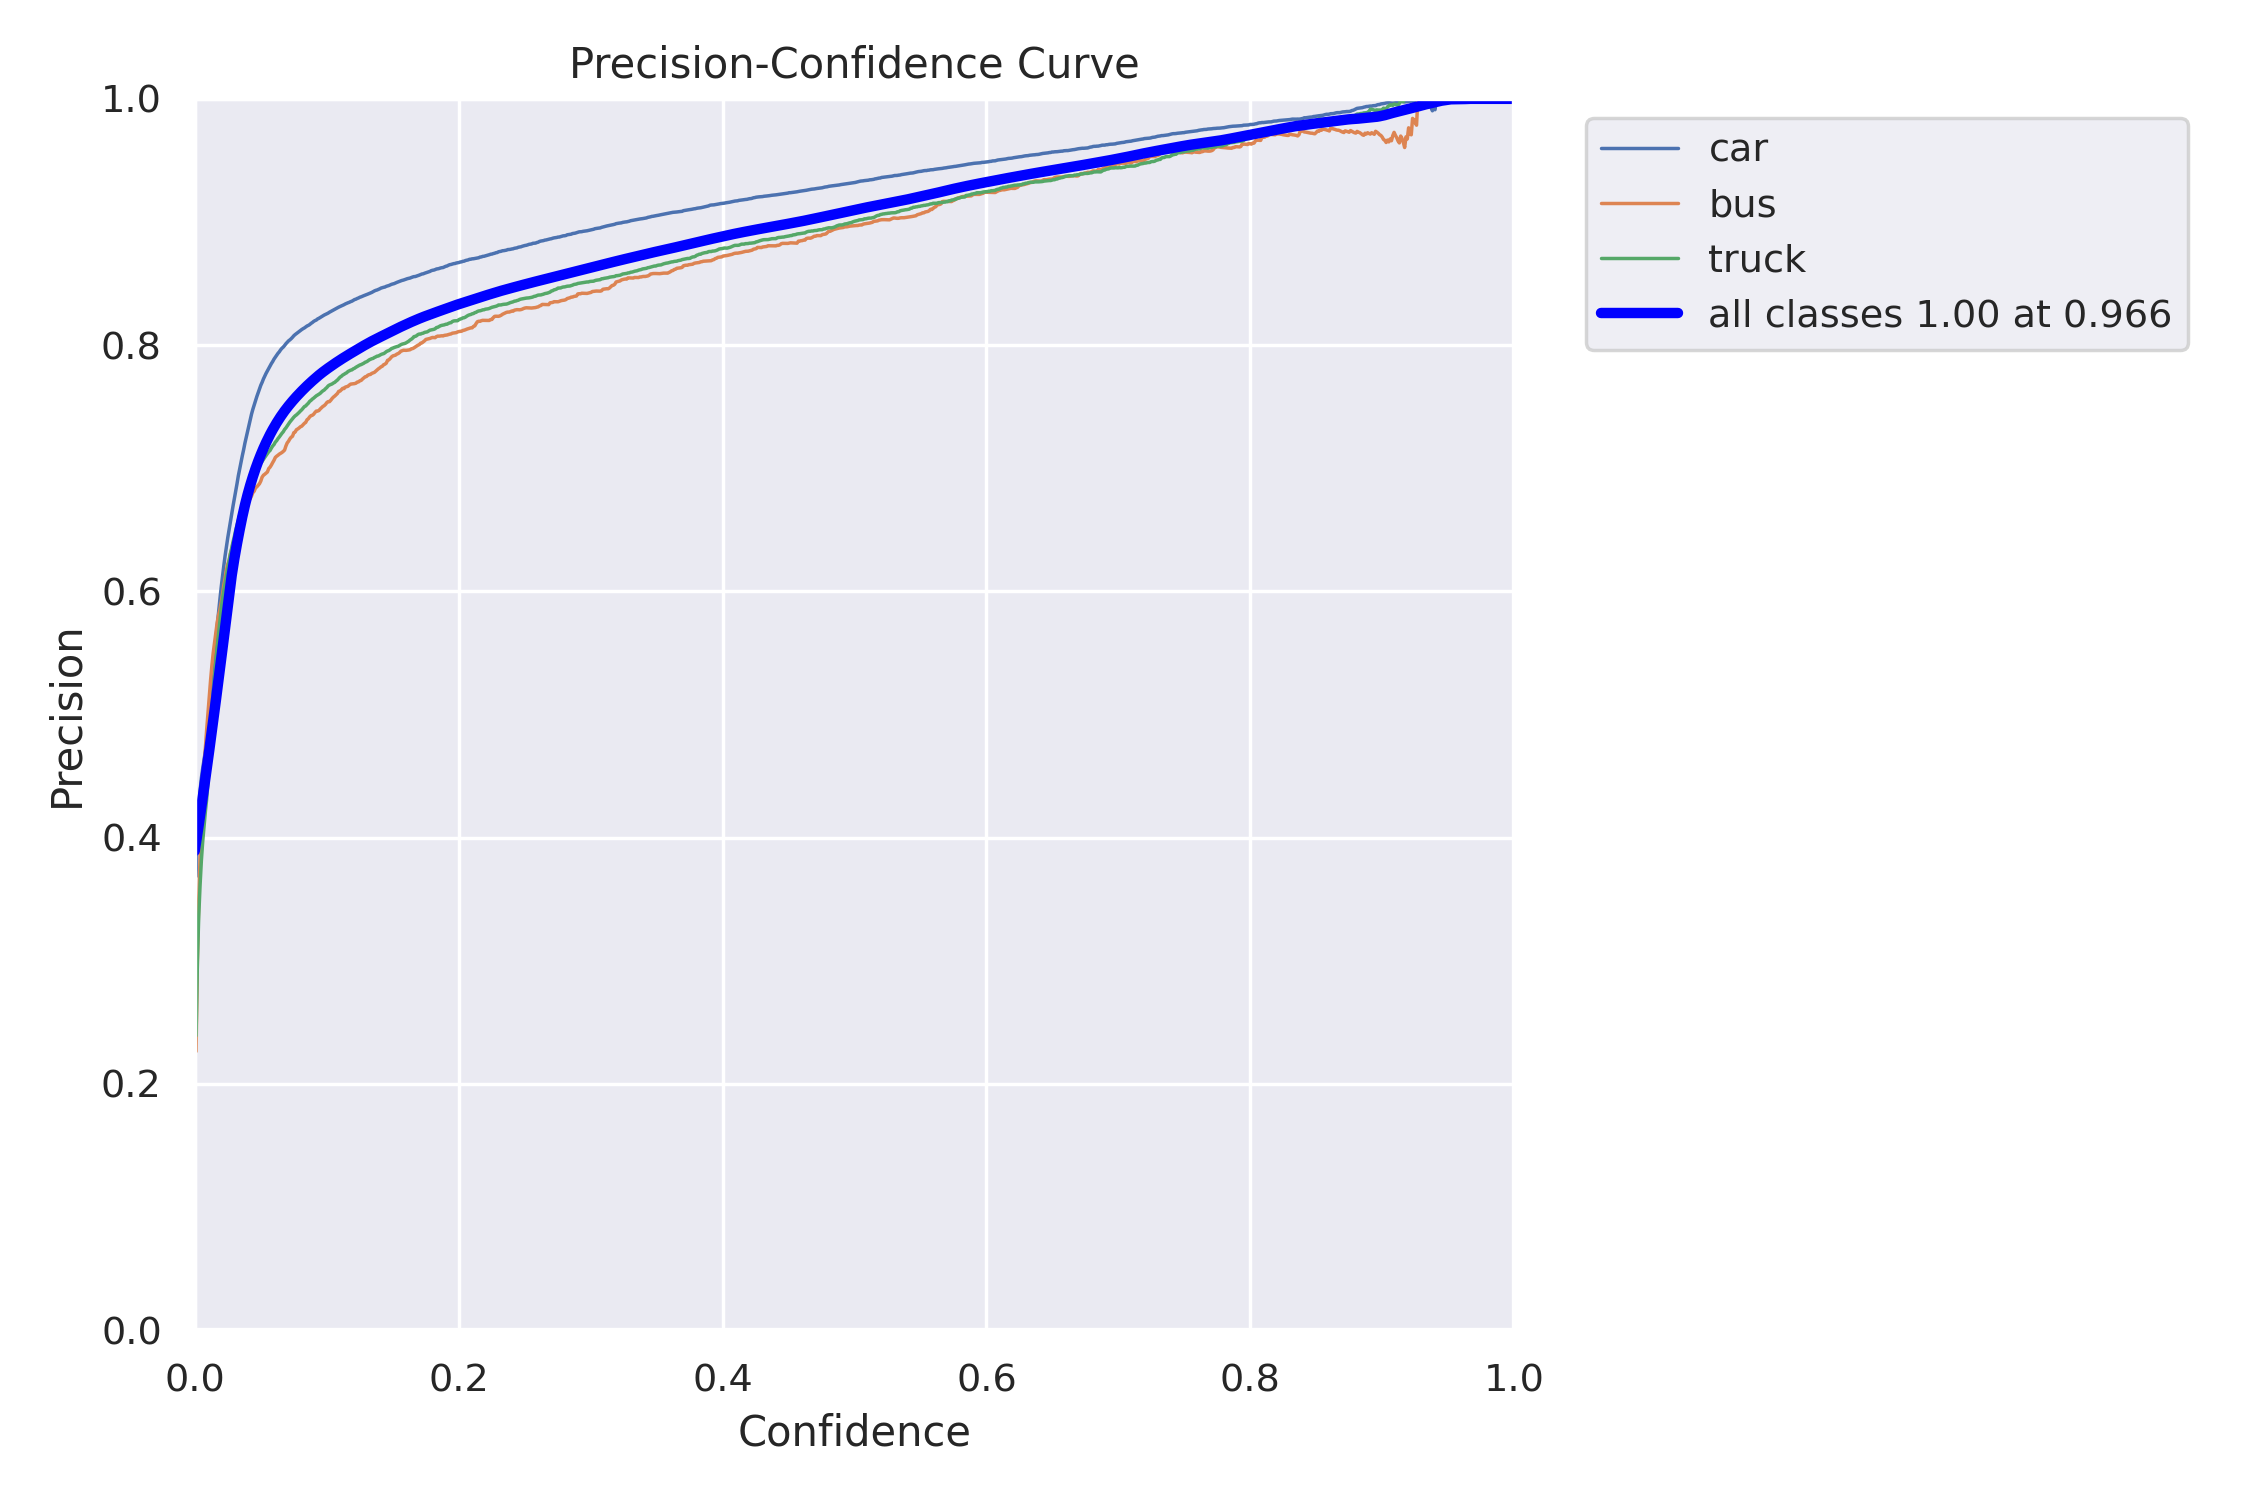

In [58]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/P_curve.png', width=600)

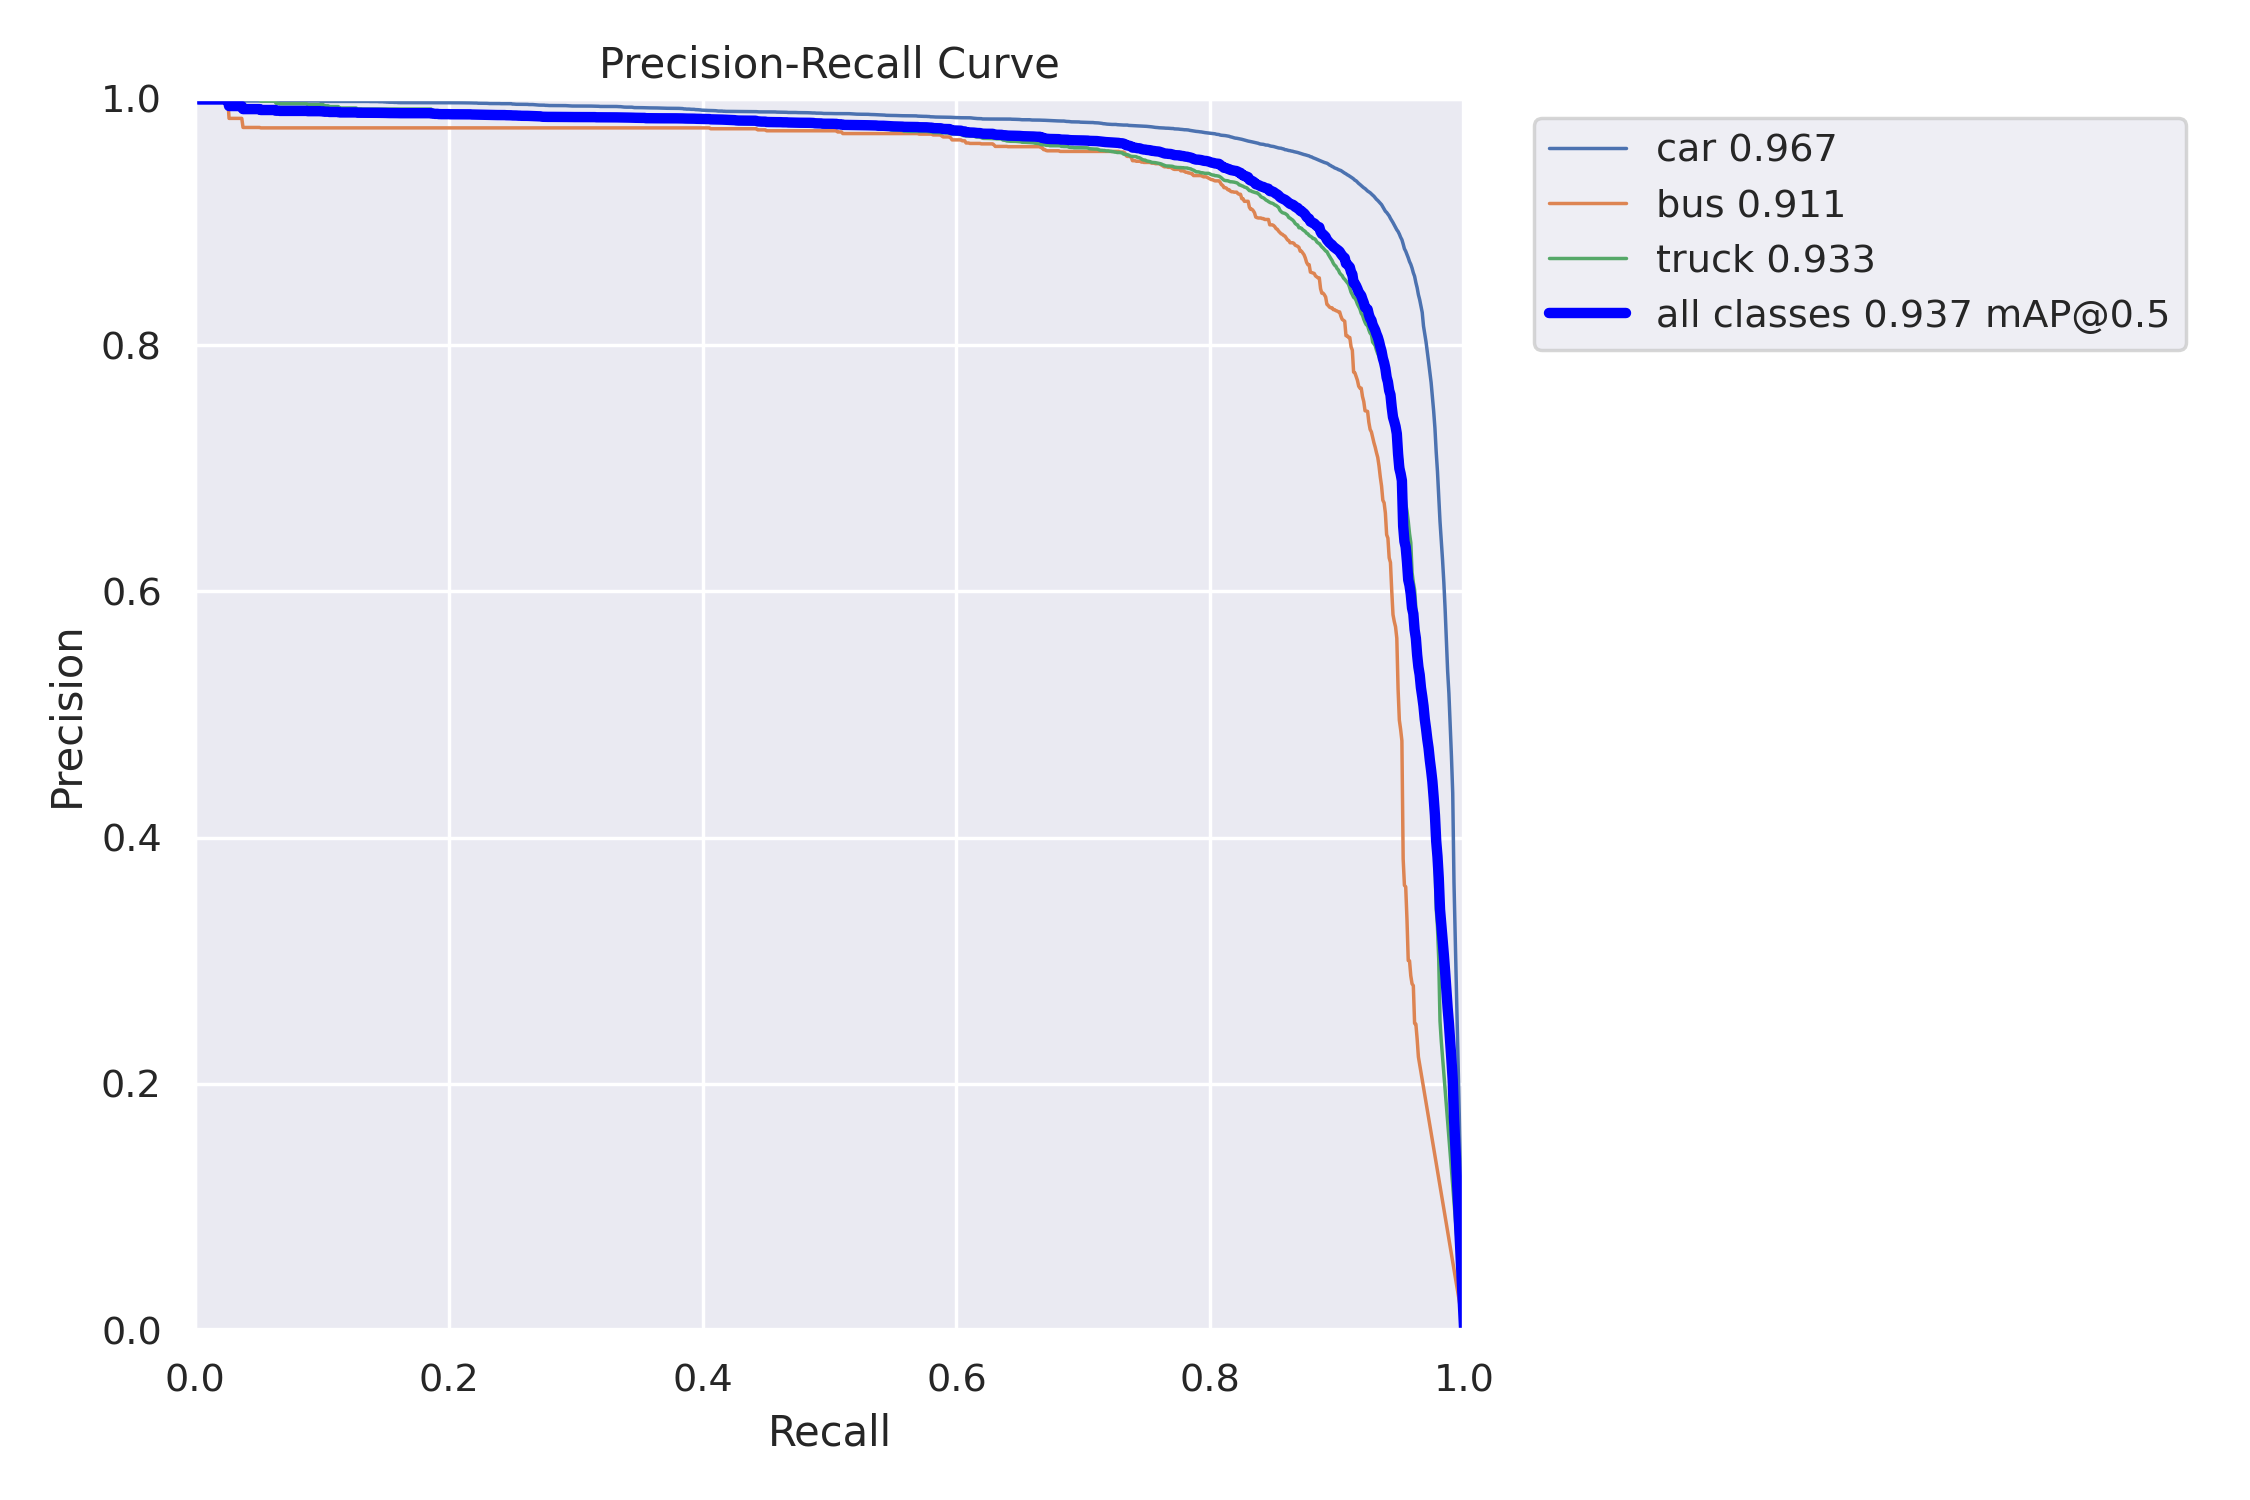

In [59]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/PR_curve.png', width=600)

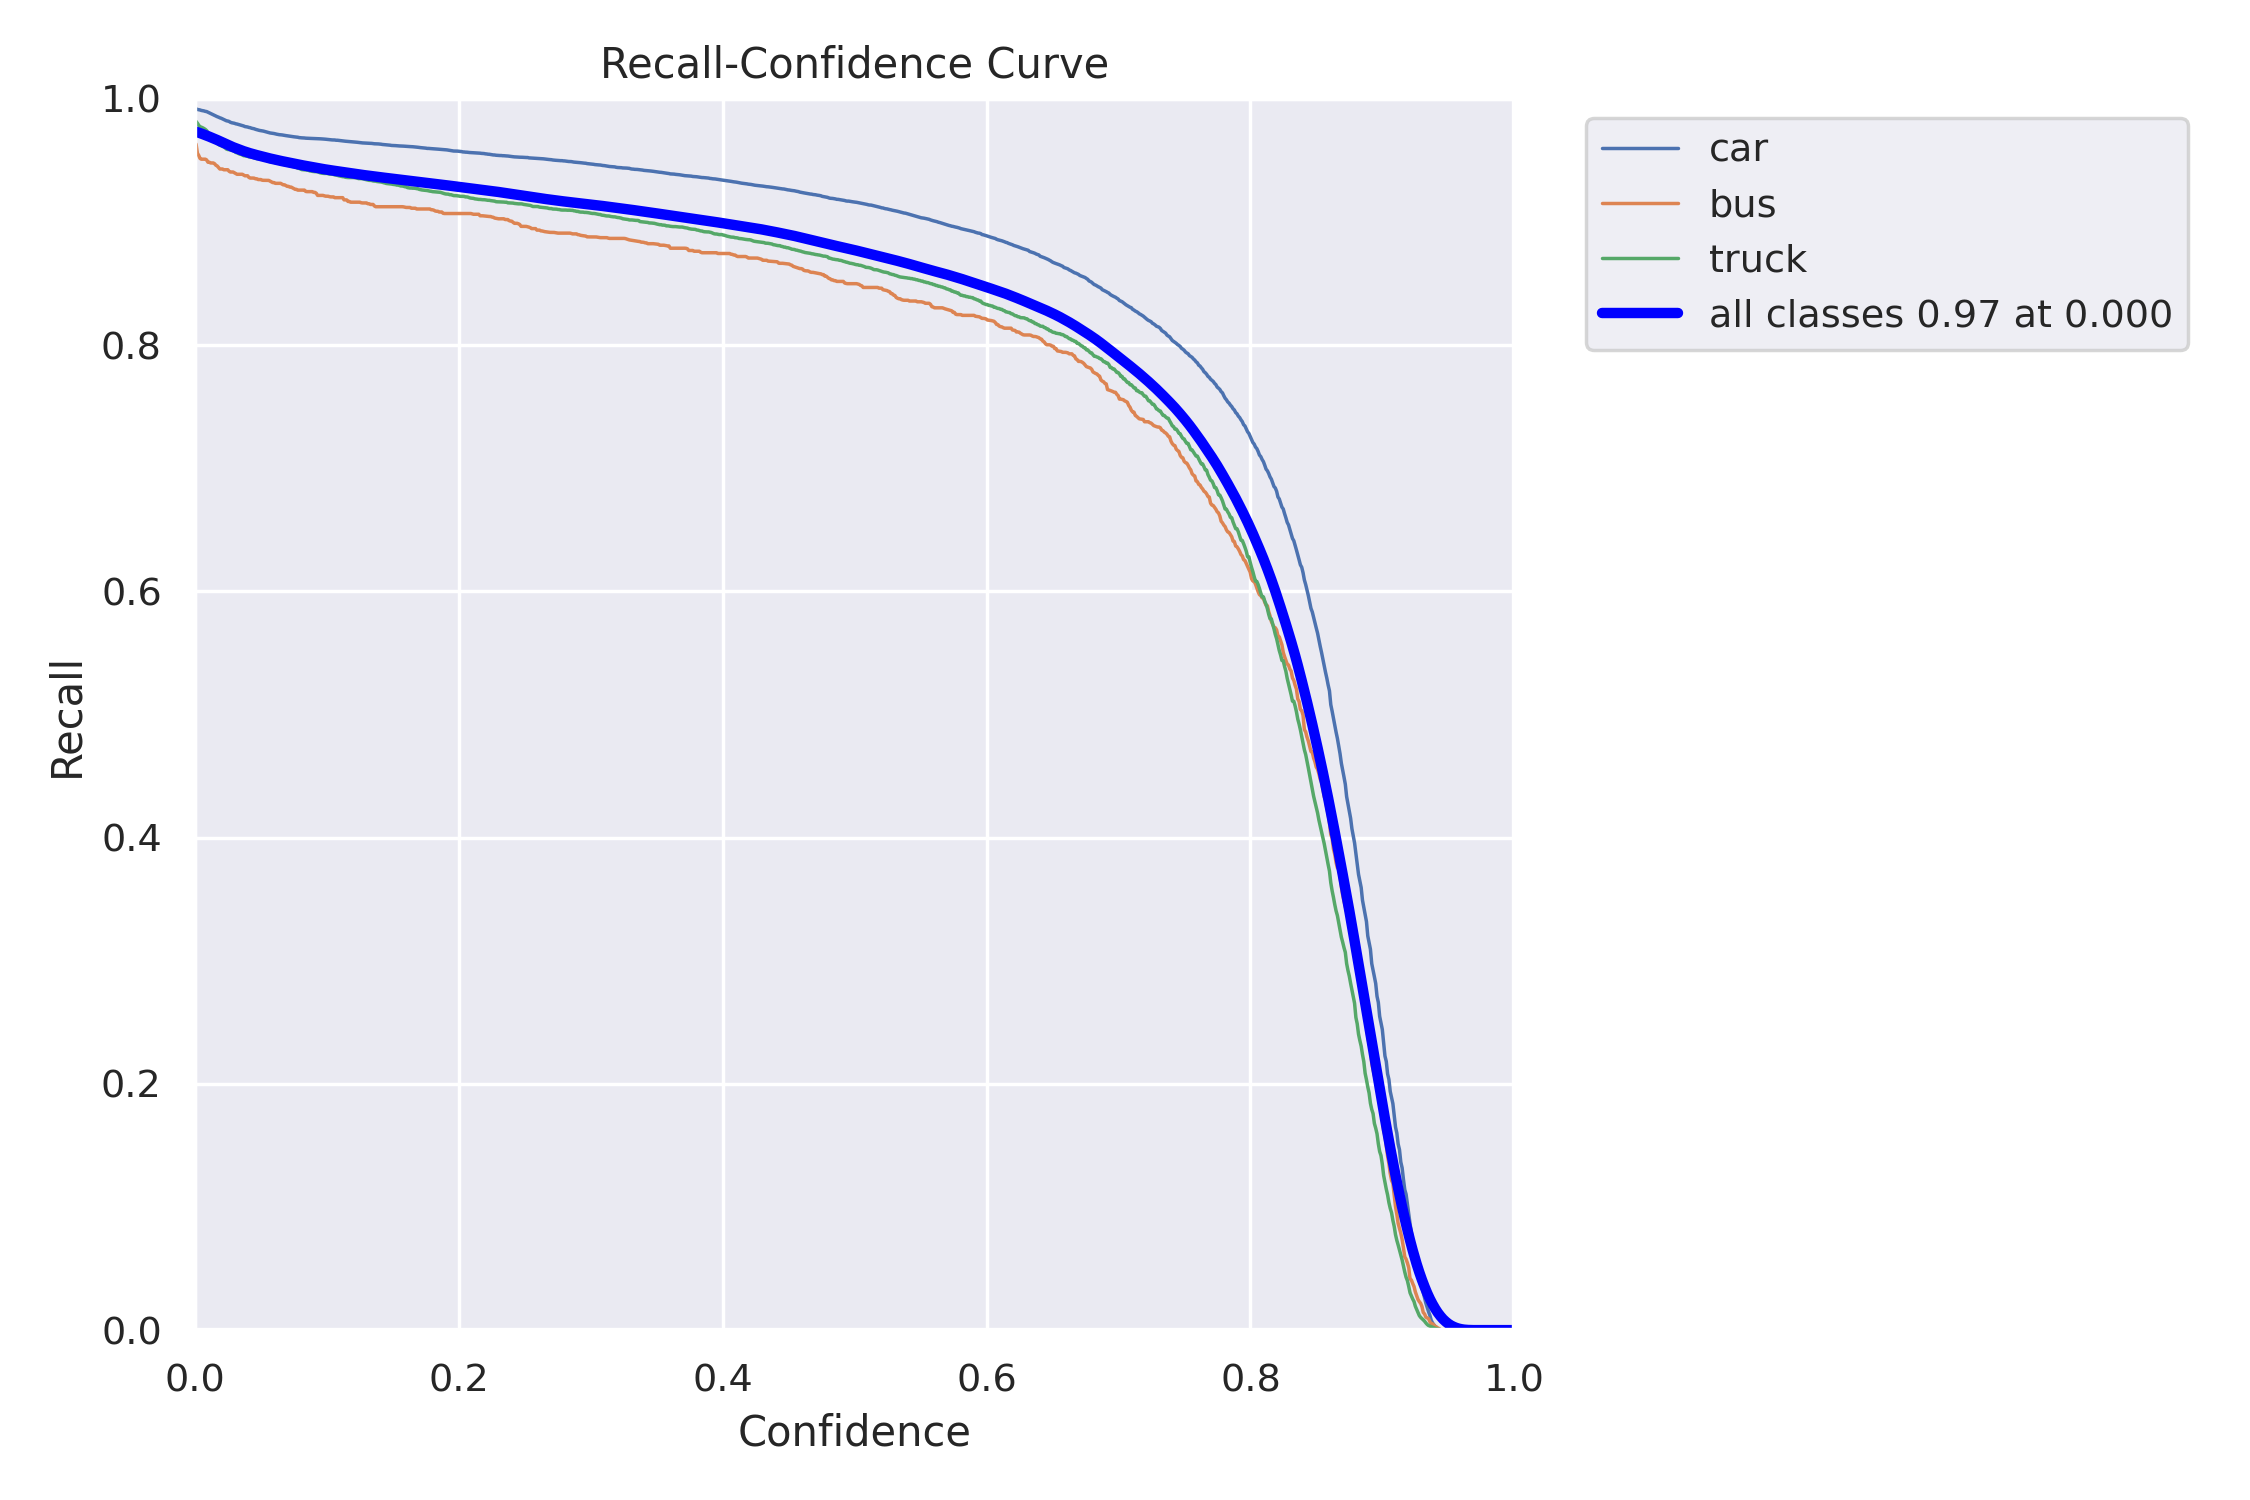

In [60]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/R_curve.png', width=600)

## Yolo v8 Result image

- 차: 0
- 버스: 1
- 트럭: 2

차, 버스, 트럭의 label을 제대로 인식하고 들어갔는지 확인

이미지를 랜덤하게 resize하여 들어간 것도 확인할 수 있음

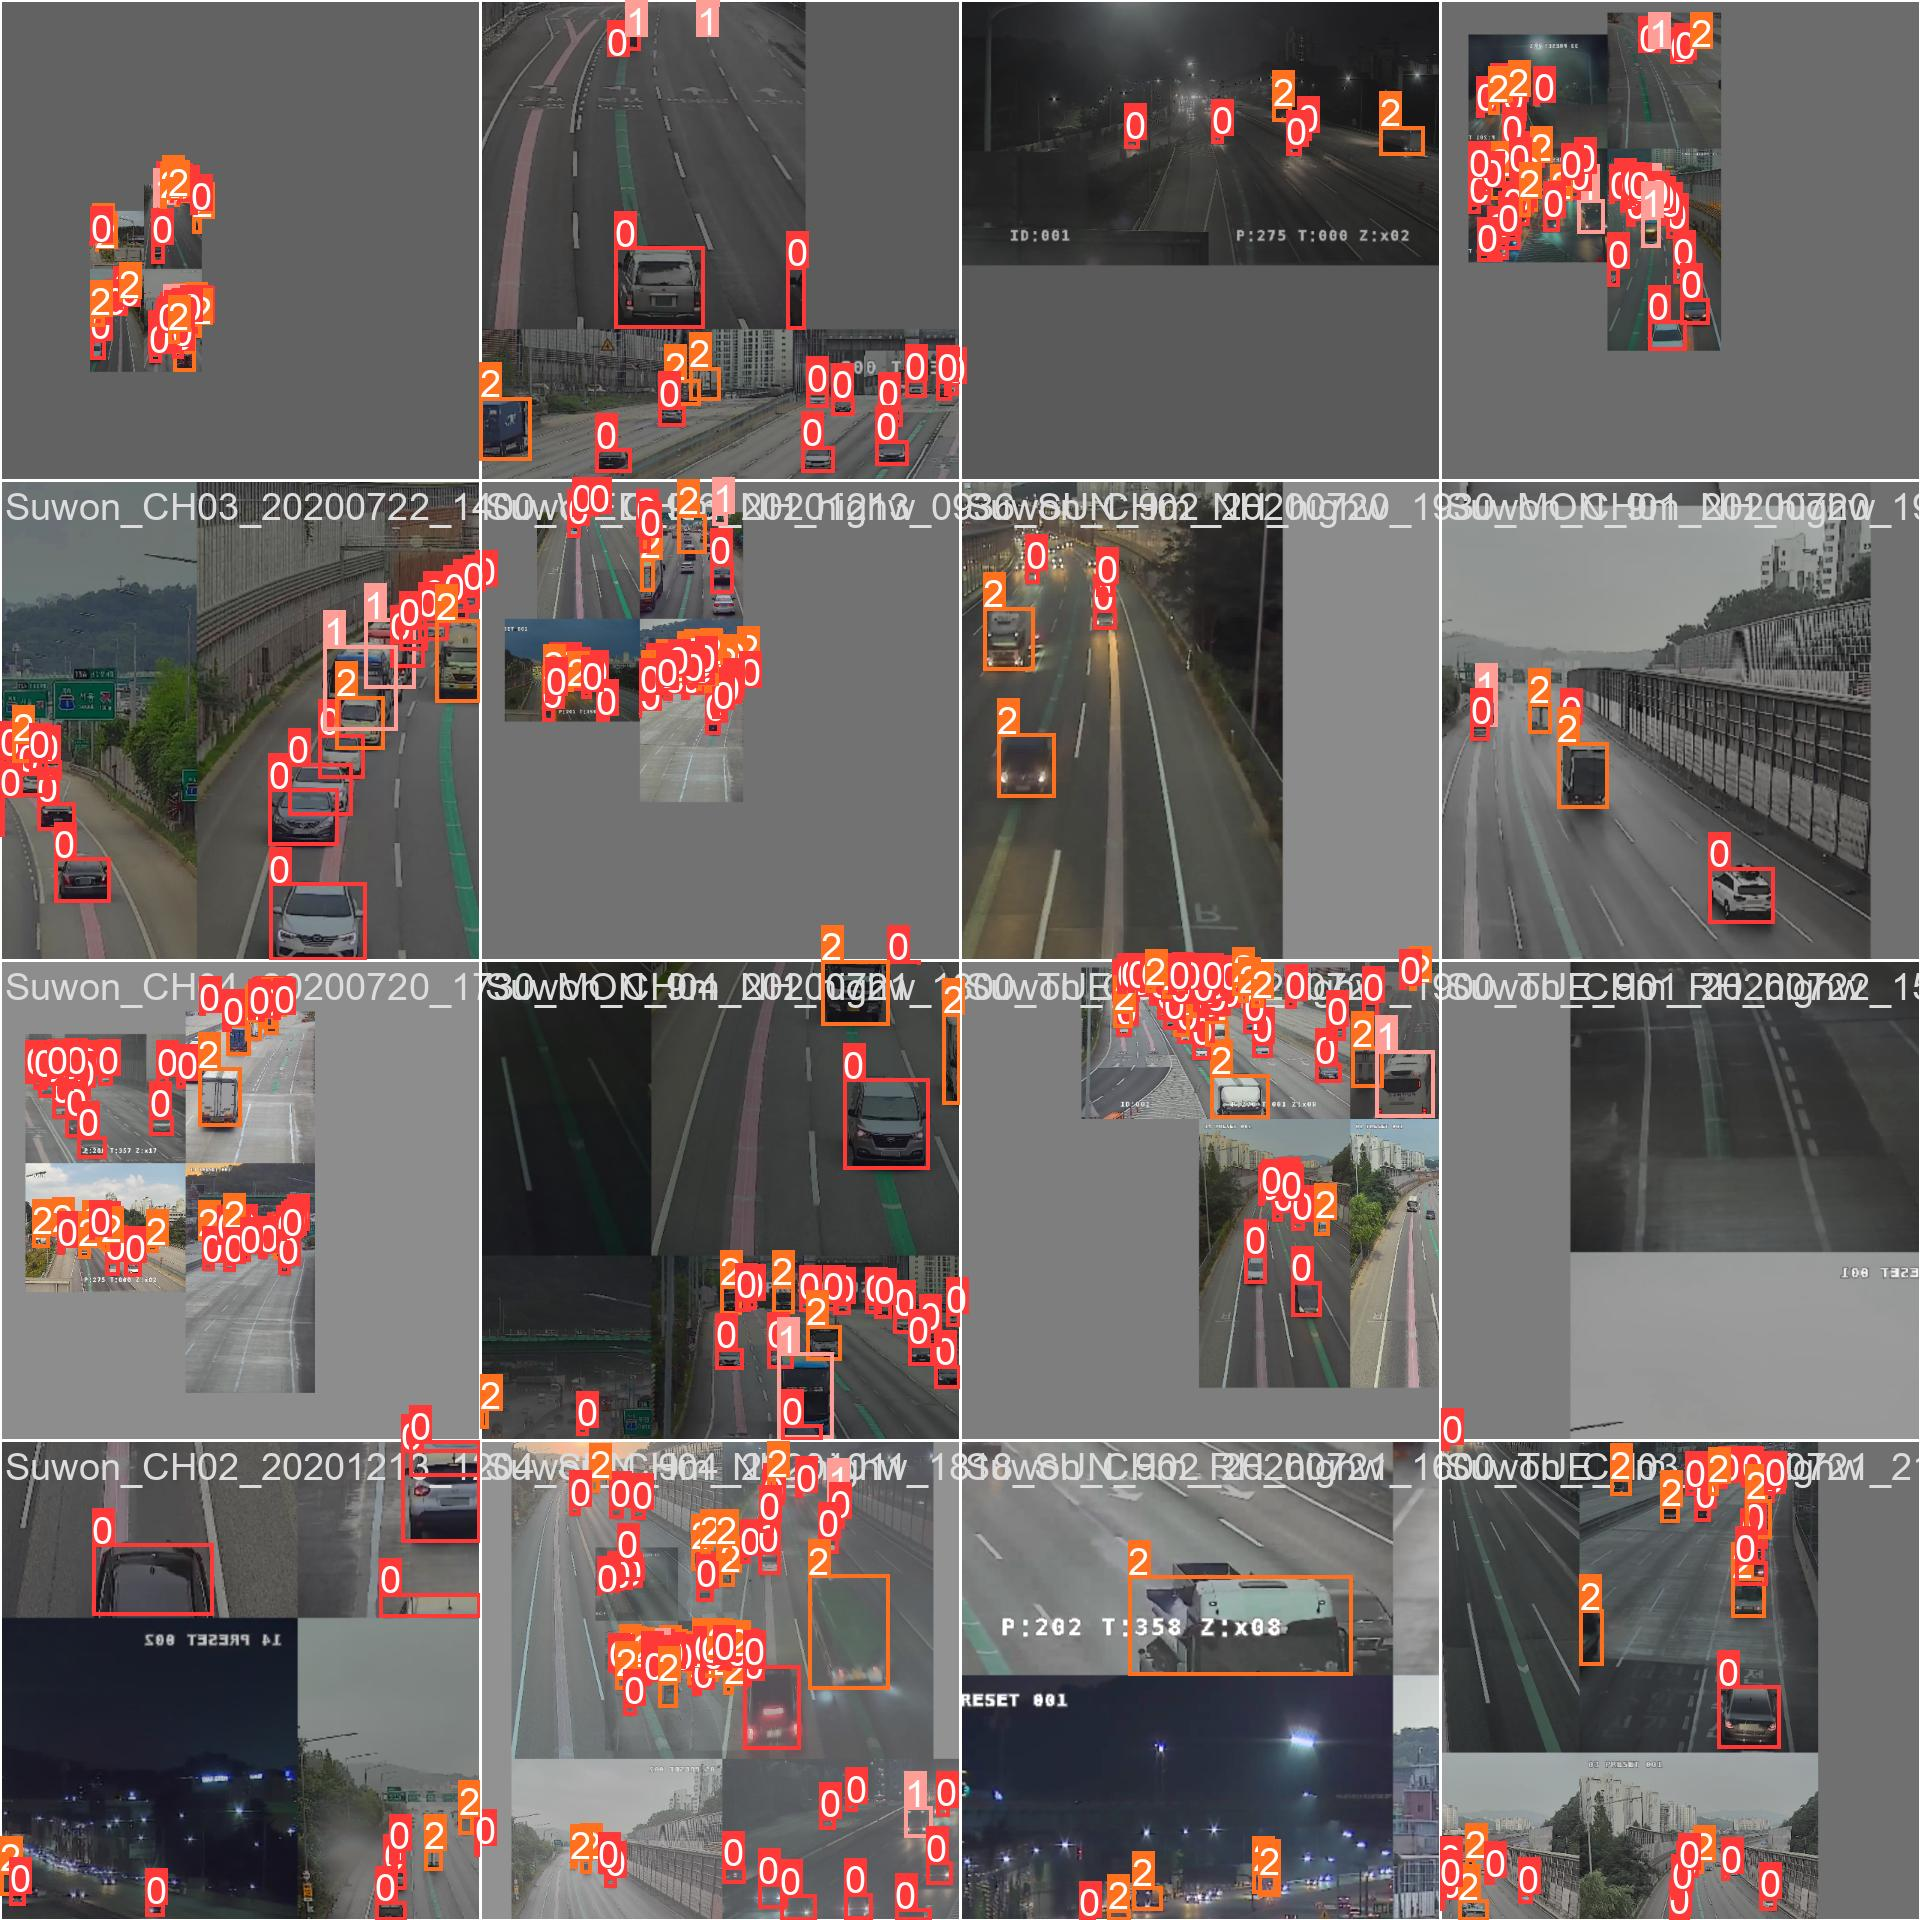

In [62]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/train_batch0.jpg', width=600)

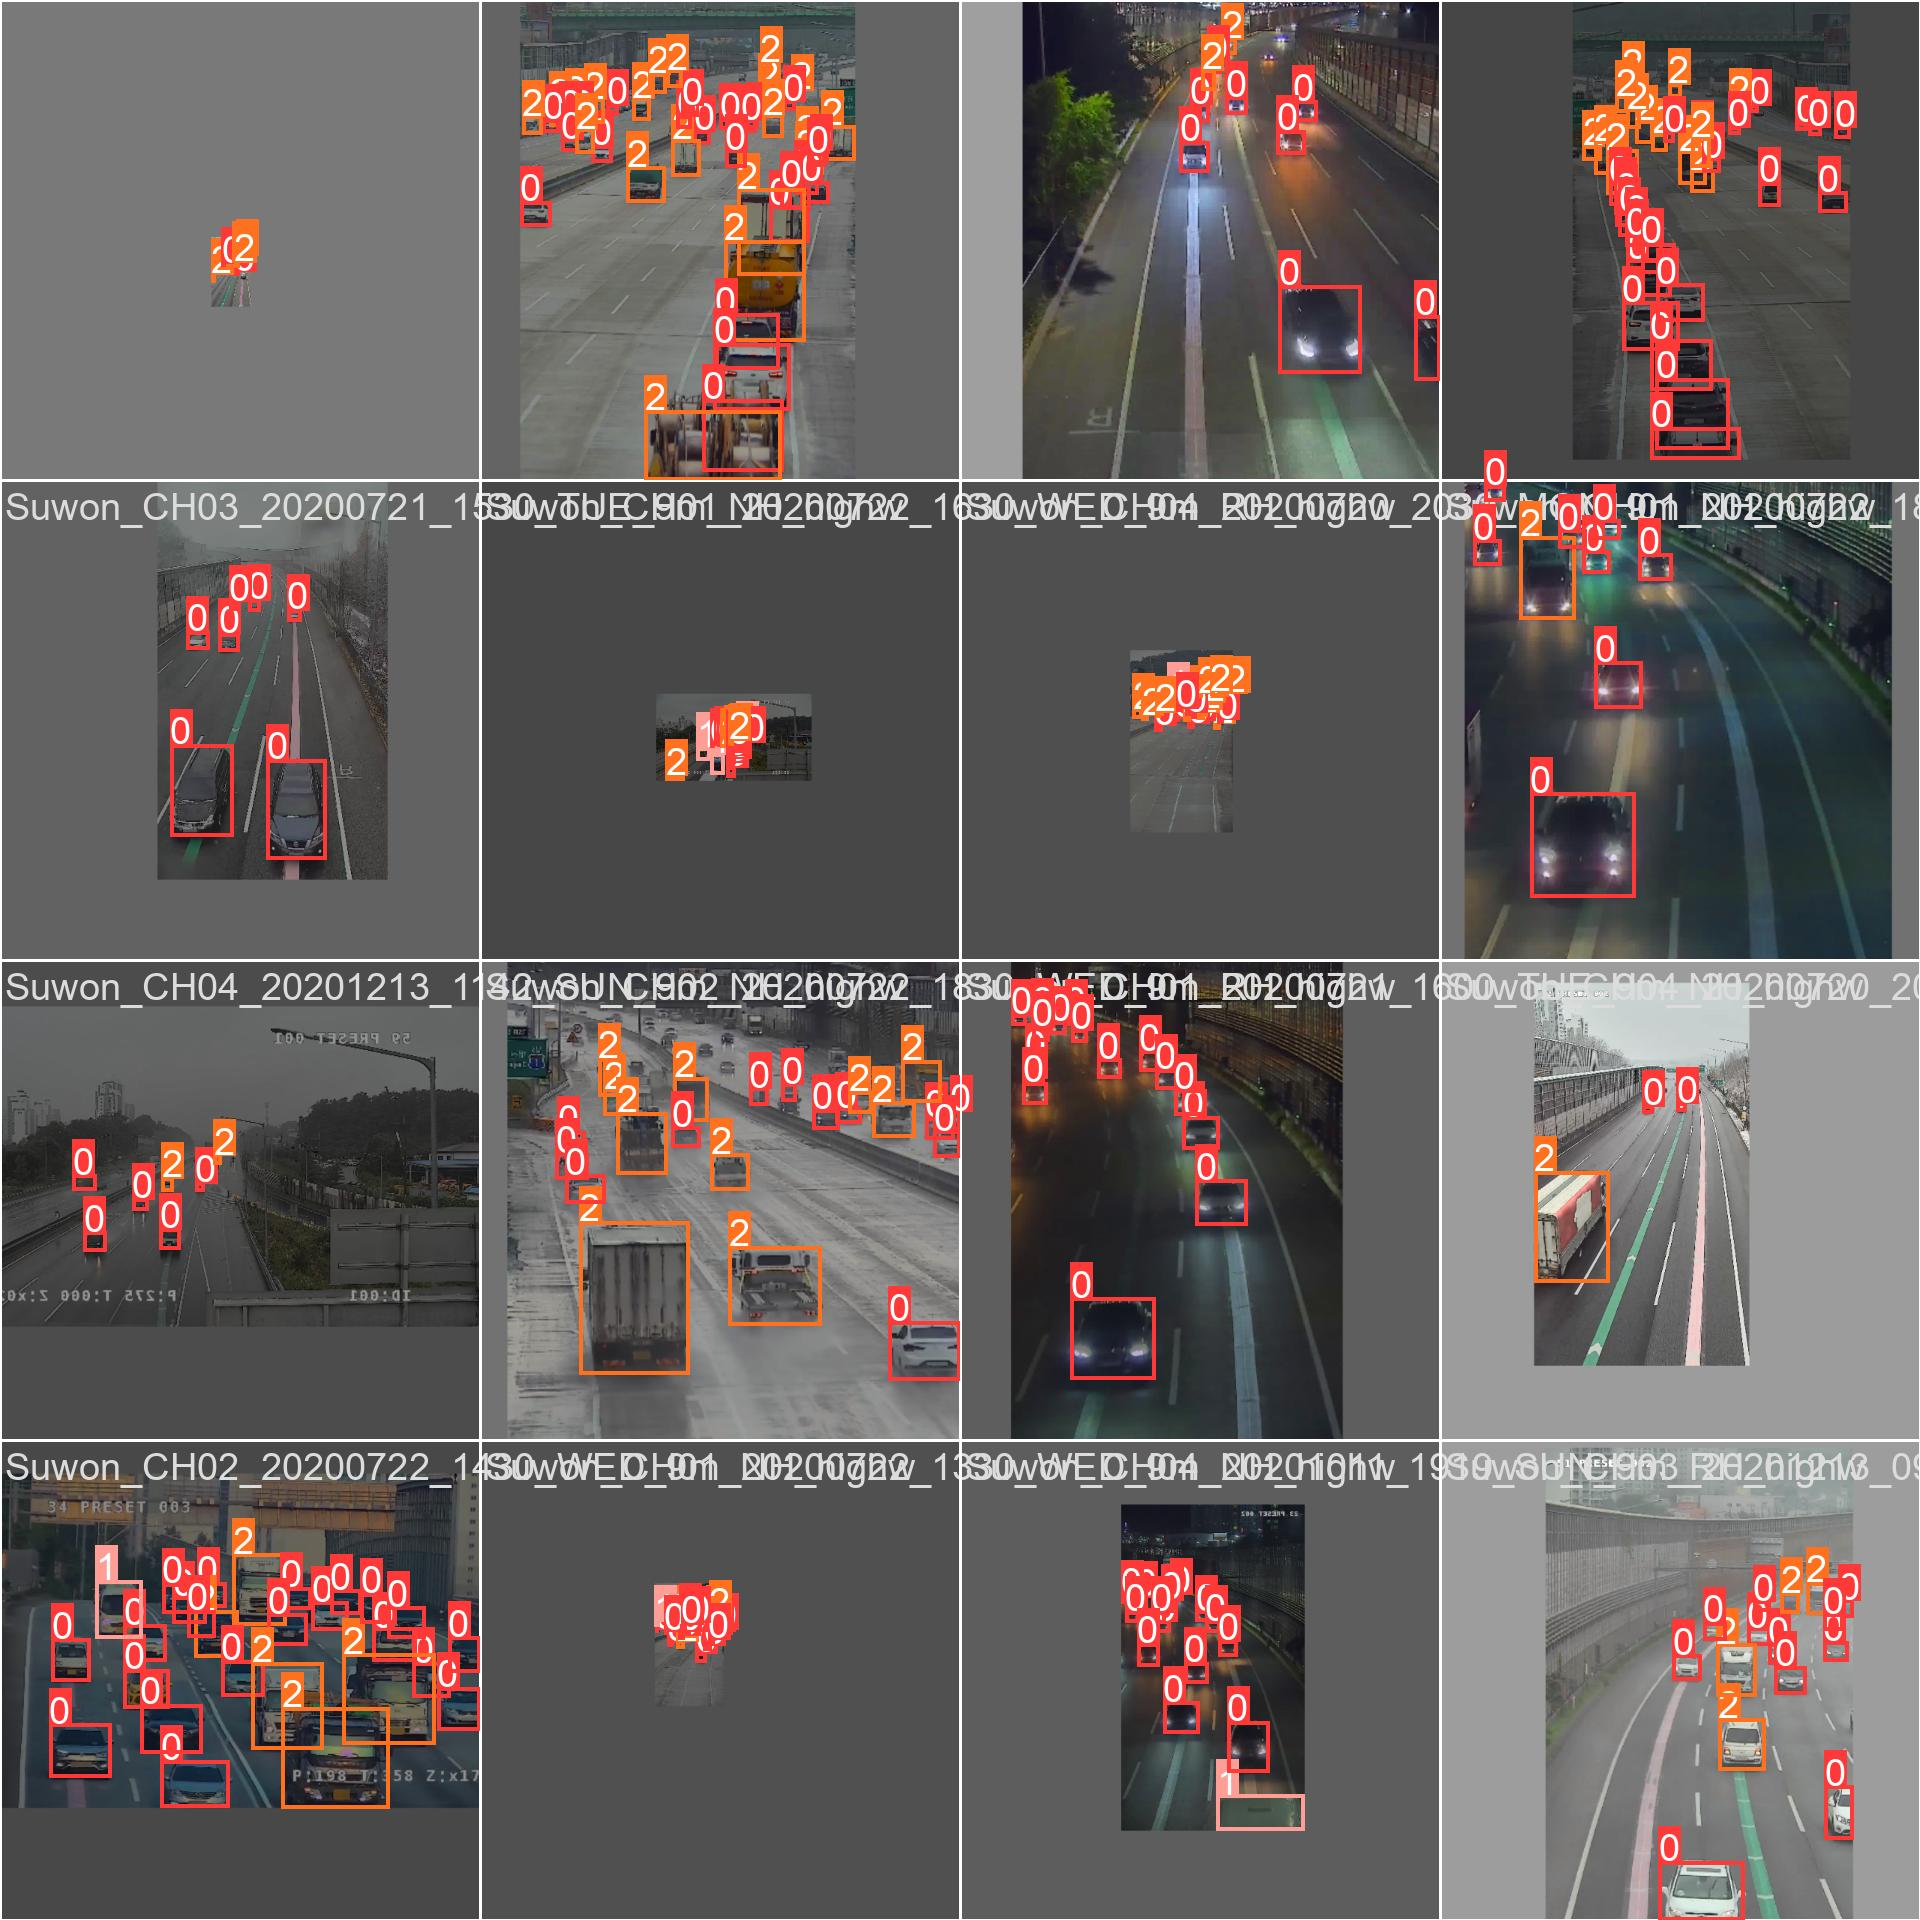

In [64]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/train_batch64440.jpg', width=600)

test set의 label과 predict 결과

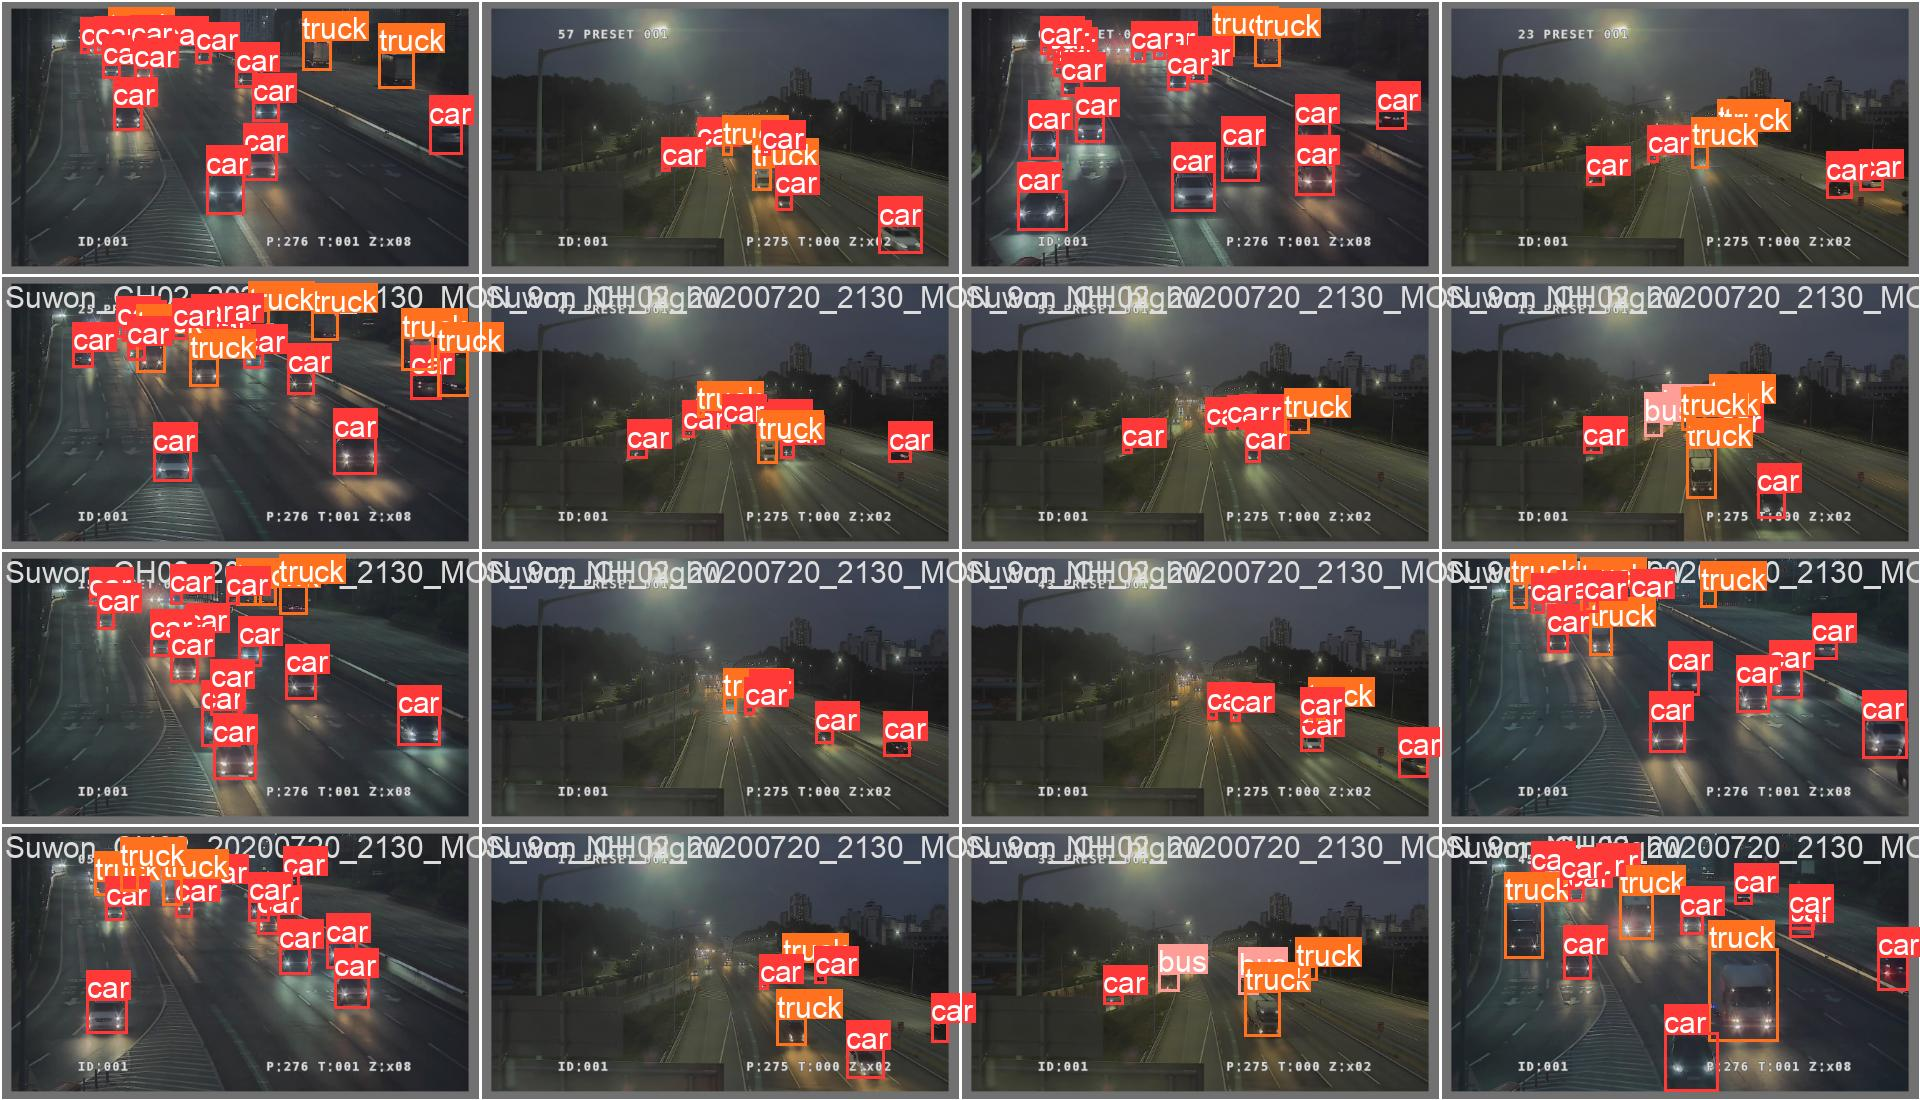

In [65]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/val_batch0_labels.jpg', width=600)

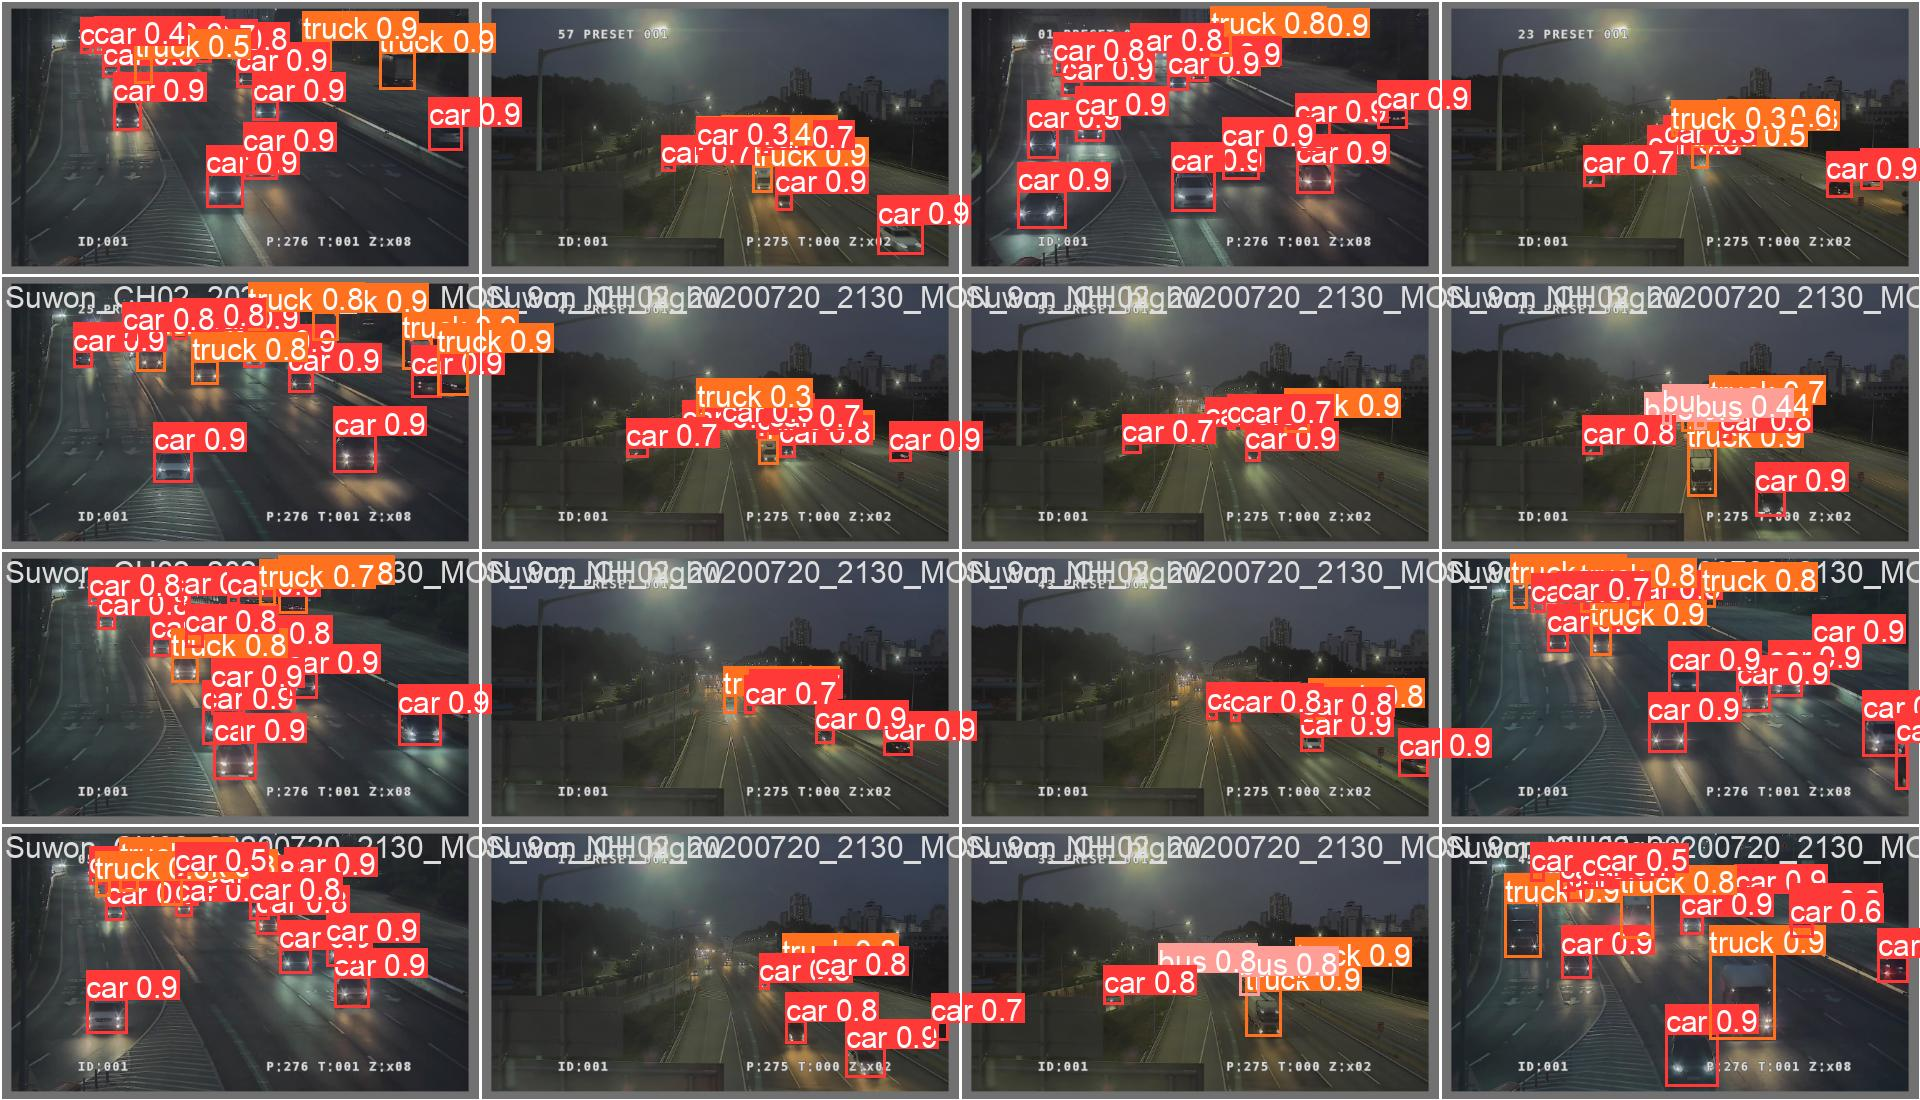

In [66]:
Image(filename=f'/home/jupyter/train_test/dataset/runs/detect/train6/val_batch0_pred.jpg', width=600)